Чистка и предобработка данных

In [1394]:
# Загружаем все необходимые для обработки и анализа данных библиотеки
from google.colab import files
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import sklearn.linear_model as lm


In [1395]:
files.upload()

Saving final_task.xlsx to final_task (8).xlsx


{'final_task.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\xebz\xd2\x93b\x01\x00\x00\x90\x04\x00\x00\x13\x00\xdc\x01[Content_Types].xml \xa2\xd8\x01(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [1396]:
# Подгружаю данные из xlsx, так как после скачивания изучала данные в Excel
# Записываем датасет в переменную dataset
dataset = pd.read_excel('final_task.xlsx')

In [1397]:
# Делаем обзор шапки датасета
dataset.head()

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10 805 ?,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32 900 ?,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35 720 ?,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39 237 ?,Купили более 10 раз,1 отзыв,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76 188 ?,Купили более 200 раз,94 отзыва,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [1398]:
# Смотрим колличество признаков, наблюдений
dataset.shape

(4500, 16)

In [1399]:
# Информация о датасете
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     4500 non-null   int64 
 1   title                          4500 non-null   object
 2   price                          4499 non-null   object
 3   sales                          1164 non-null   object
 4   feedbacks                      4500 non-null   object
 5   seller                         4391 non-null   object
 6   seller_rating                  4389 non-null   object
 7   Процессор                      4500 non-null   object
 8   Оперативная память             4500 non-null   object
 9   Жесткий диск                   4500 non-null   object
 10  Видеопроцессор                 4500 non-null   object
 11  Операционная система           4500 non-null   object
 12  Гарантийный срок               2648 non-null   object
 13  Стр

In [1400]:
# Для избежания ошибок в работе с датасетом, создаю его копию для очистки и предобработки
df_copy = dataset.copy()
df_copy

,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
0,10148385,Системный блок OFFICE 120 WB 0710623 J1800/4Gb...,10 805 ?,Купили более 400 раз,7 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Celeron', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics,отсутствует,3года,Россия,"{'Ширина предмета': '28.5 см', 'Глубина предме...","{'Длина упаковки': '43.5 см', 'Ширина упаковки..."
1,17877962,Системный блок,32 900 ?,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,Китай,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '43 см', 'Ширина упаковки':..."
2,17880420,Компьютер Hp Prodesk 400 g6 mt,35 720 ?,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,Офисный Компьютер Robotcomp Казначей V1,39 237 ?,Купили более 10 раз,1 отзыв,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,Игровой Компьютер Robotcomp М16 2.0 V1,76 188 ?,Купили более 200 раз,94 отзыва,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,152971271,Игровой ПК,70 000 ?,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 гб', 'Объем нак...",Nvidia,Windows 10 pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4496,152978335,Игровой ПК,70 000 ?,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 Гб', 'Объем нак...",NVIDIA,Windows 10 Pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4497,152979371,Игровой ПК,70 000 ?,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 Гб', 'Объем нак...",NVIDIA,Windows 10 Pro,1 год,NaN,"{'Ширина предмета': '35 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4498,152979918,Игровой ПК,70 000 ?,NaN,0 отзывов,Personal PC,0.0,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': '1000 гб', 'Объем нак...",Nvidia,Windows 10 pro,1 год,NaN,"{'Ширина предмета': '30 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."


In [1401]:
# По нашему кейсу нам нужно проанализировать только ПК, за исключением мини-ПК и моноблоков. Приведем все наименования пк к одному регистру
# Удалим лишние наименования: кабели, моноблоки, pos-компьютеры, и проч.

df_copy['title'] = df_copy['title'].str.lower()
clean_data = df_copy[df_copy['title'].str.contains('компьютер','intel')]
clean_data = clean_data[~clean_data['title'].str.contains('pos-компьютер|кабель|мини|мини-компьютер|мышка|системный блок|микрокомпьютер')]
clean_data.head()


,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
2,17880420,компьютер hp prodesk 400 g6 mt,35 720 ?,NaN,0 отзывов,NaN,NaN,"{'Процессор_тип': 'не заполнено', 'Количество ...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",не заполнено,отсутствует,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': None, 'Ширина упаковки': No..."
3,19347937,офисный компьютер robotcomp казначей v1,39 237 ?,Купили более 10 раз,1 отзыв,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel UHD Graphics 630,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '28 см', 'Глубина предмета...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4,19348951,игровой компьютер robotcomp м16 2.0 v1,76 188 ?,Купили более 200 раз,94 отзыва,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
5,19355097,игровой компьютер robotcomp m-16 v1,55 625 ?,Купили более 40 раз,12 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
6,19355097,игровой компьютер robotcomp m-16 v1,55 625 ?,Купили более 40 раз,12 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [1402]:
# Сделаем обзор наблюдений и признаков
clean_data.shape

(3075, 16)

In [1403]:
# Сделаем обзор признаков
clean_data.columns

Index(['product_id', 'title', 'price', 'sales', 'feedbacks', 'seller',
       'seller_rating', 'Процессор', 'Оперативная память', 'Жесткий диск',
       'Видеопроцессор', 'Операционная система', 'Гарантийный срок',
       'Страна производства', 'Габариты товара',
       'Габариты товара (с упаковкой)'],
      dtype='object')

In [1404]:
# Прежде,чем удалить колонки, с которыми я не планирую работать(в том числе колонку 'product_id')
# Cчитаю важным проверить есть ли дубликаты по индексу и сразу их удалить  во избежание задваивания точно повторяющихся товаров
# Наличие дубликатов по оставшимся признакам считаю целесообразным не удалять, т.к. название компьютеров, цены,
# продажи могут относиться в разным позициям, представленным у разных производителей на сайте продаж конкурента
clean_data.duplicated(subset='product_id').sum()

329

In [1405]:
clean_data[clean_data.duplicated(subset='product_id')]


,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
6,19355097,игровой компьютер robotcomp m-16 v1,55 625 ?,Купили более 40 раз,12 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
13,19877489,игровой компьютер robotcomp ту 160 v2,98 470 ?,Купили более 5 раз,6 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3050,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '21 см', 'Глубина предмета...","{'Длина упаковки': '48 см', 'Ширина упаковки':..."
18,19882754,игровой компьютер robotcomp m1620 v3,71 829 ?,Купили более 50 раз,25 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1660,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
34,21128147,мощный игровой компьютер robotcomp анаконда 3....,160 066 ?,Купили более 5 раз,0 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3080,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '21 см', 'Глубина предмета...","{'Длина упаковки': '57 см', 'Ширина упаковки':..."
48,21402635,игровой компьютер robotcomp анаконда v3,86 141 ?,Купили более 30 раз,16 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce RTX 3060,Windows 10 Pro,3 Года (36 месяцев),Россия,"{'Ширина предмета': '21 см', 'Глубина предмета...","{'Длина упаковки': '57 см', 'Ширина упаковки':..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4462,152496853,игровой компьютер titan x1 white,60 681 ?,NaN,0 отзывов,Buchok,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",AMD Radeon RX 580,Windows 11 Pro,NaN,NaN,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '60 см', 'Ширина упаковки':..."
4469,152578155,офисный компьютер life tech office i3-2120 ram...,18 839 ?,NaN,0 отзывов,ABS-TECHNO.RU,2023-04-04 00:00:00,"{'Процессор_тип': 'Intel Core i3', 'Количество...","{'Тип оперативной памяти': 'DDR 3', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",Intel HD Graphics 2000,Windows 10 Pro,1 год (12 месяцев),Россия,"{'Ширина предмета': None, 'Глубина предмета': ...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4477,152721637,"компьютер /16gb/ssd-512/монитор 24""",72 800 ?,NaN,0 отзывов,Компьютерс,2023-05-04 00:00:00,"{'Процессор_тип': 'Intel E5', 'Количество ядер...","{'Тип оперативной памяти': 'не заполнено', 'Об...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1050,Windows 11 Pro,1 год,Россия,"{'Ширина предмета': '40 см', 'Глубина предмета...","{'Длина упаковки': '40 см', 'Ширина упаковки':..."
4479,152726934,офисный компьютер life tech office i5-2400 ram...,20 315 ?,NaN,0 отзывов,ABS-TECHNO.RU,2023-04-04 00:00:00,"{'Процессор_тип': 'Intel Core i3', 'Количество...","{'Тип оперативной памяти': 'DDR 

In [1406]:
# Видим, что дубликаты идентичны
clean_data[clean_data.product_id == 19355097]


,product_id,title,price,sales,feedbacks,seller,seller_rating,Процессор,Оперативная память,Жесткий диск,Видеопроцессор,Операционная система,Гарантийный срок,Страна производства,Габариты товара,Габариты товара (с упаковкой)
5,19355097,игровой компьютер robotcomp m-16 v1,55 625 ?,Купили более 40 раз,12 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."
6,19355097,игровой компьютер robotcomp m-16 v1,55 625 ?,Купили более 40 раз,12 отзывов,Robotcomp,2023-07-04 00:00:00,"{'Процессор_тип': 'Intel Core i5', 'Количество...","{'Тип оперативной памяти': 'DDR 4', 'Объем опе...","{'Объем накопителя HDD': None, 'Объем накопите...",NVIDIA GeForce GTX 1650,windows пробная,3 Года (36 месяцев),Россия,"{'Ширина предмета': '20 см', 'Глубина предмета...","{'Длина упаковки': '50 см', 'Ширина упаковки':..."


In [1407]:
# Удаляю дубликаты по id
clean_data.drop_duplicates(subset='product_id', inplace=True)


In [1408]:
# Проверяю, корректно ли прошло удаление, сколько осталось признаков
clean_data.shape

(2746, 16)

In [1409]:
# Теперь можно удалять неинтересующие признаки, для этого создаю список колонок на удаление
columns = ['product_id','seller','seller_rating', 'Габариты товара',
       'Габариты товара (с упаковкой)', 'Гарантийный срок', 'Страна производства' ]


In [1410]:
# Удаляю лишние
clean_data.drop(columns=columns, inplace=True)

In [1411]:
# Проверяю какие признаки остались для дальнейшей работы
clean_data.columns

Index(['title', 'price', 'sales', 'feedbacks', 'Процессор',
       'Оперативная память', 'Жесткий диск', 'Видеопроцессор',
       'Операционная система'],
      dtype='object')

In [1412]:
# Видим,что пропусков по графе с ценой нет
clean_data['price'].isna().sum()

0

In [1413]:
# Очистим цену от лишних знаков и переведем в тип int46 для дальнейшего анализа
import re
def clear_price(price):
  return re.sub('\D', '', price)
clean_data['clear_price'] = clean_data['price'].apply(clear_price)

In [1414]:
clean_data['clear_price'] = clean_data['clear_price'].astype(int)
clean_data['clear_price']

2        35720
3        39237
4        76188
5        55625
7       128284
         ...  
4490     77250
4491     77250
4492     77250
4493     77250
4494     77250
Name: clear_price, Length: 2746, dtype: int64

In [1415]:
# Удалю столбец 'price' и для удобства переименую очищенную цену в price
clean_data.drop(columns='price', inplace=True)
clean_data.rename(columns={'clear_price':'price'}, inplace=True)

In [1416]:
# Так же очищу сразу колонку 'feedbacks'
def clear_feedbacks(feedbacks):
  return re.sub('\D', '', feedbacks)
clean_data['clear_feedbacks'] = clean_data['feedbacks'].apply(clear_feedbacks).astype(int)

In [1417]:
# Так же удалю лишнюю колонку и переименую последнюю получившуюся
clean_data.drop(columns='feedbacks', inplace=True)
clean_data.rename(columns={'clear_feedbacks':'feedbacks'}, inplace=True)

In [1418]:
# Распакуем данные из колонок 'Процессор', 'Оперативная память', 'Жесткий диск'
clean_data['Процессор'][7]

"{'Процессор_тип': 'Intel Core i5', 'Количество ядер процессора': '10'}"

In [1419]:
# Посмотрим тип данных
type(clean_data['Процессор'][7])

str

In [1420]:
# Пишем функцию для последущего применения к столбцу, при этом вычленяя тип процессора
def text_to_json(text):
  result = json.loads(text.replace("'", '"'))['Процессор_тип']
  return result

In [1421]:
clean_data['Процессор_тип'] = clean_data['Процессор'].apply(text_to_json)

In [1422]:
# Вытаскиваю в отдельную колонку значение 'Количество ядер процессора'
def text_to_json2(text):
  result = json.loads(text.replace("'", '"'))['Количество ядер процессора']
  return result

In [1423]:
clean_data['Количество ядер процессора'] = clean_data['Процессор'].apply(text_to_json2)

In [1424]:
# Почистим значения
clean_data['Количество ядер процессора'].unique()

array(['не заполнено', '6', '10', '4', '2', '12', '16', '8', '2 ядра',
       '14', '20'], dtype=object)

In [1425]:
# Создадим функцию для преобразования значений
def clear_number_of_cores(data):
  if data == 'не заполнено':
    result = np.nan
  else:
    result = re.sub('\D', '', data)
  return result
clean_data['clear_number_of_cores'] = clean_data['Количество ядер процессора'].apply(clear_number_of_cores)

In [1426]:
# Проконтролируем результат
clean_data['clear_number_of_cores'].unique()

array([nan, '6', '10', '4', '2', '12', '16', '8', '14', '20'],
      dtype=object)

In [1427]:
# Сразу переведу значения в числовые
clean_data['clear_number_of_cores'] = clean_data['clear_number_of_cores'].astype('float')

In [1428]:
# Удалим лишний столбец, который больше нам не нужен и переменуем очищенную память для удобства
clean_data.drop(columns='Количество ядер процессора', inplace=True)
clean_data.rename(columns={'clear_number_of_cores':'Количество ядер процессора'}, inplace=True)

In [1429]:
# То же самое делаю для колонки 'Оперативная память'
print(clean_data['Оперативная память'][7])
type(clean_data['Оперативная память'][7])

{'Тип оперативной памяти': 'DDR 4', 'Объем оперативной памяти (Гб)': '16'}


str

In [1430]:
clean_data['Тип оперативной памяти'] = clean_data['Оперативная память'].apply(lambda x: eval(x)['Тип оперативной памяти'])

In [1431]:
clean_data['Объем оперативной памяти (Гб)'] = clean_data['Оперативная память'].apply(lambda x: eval(x)['Объем оперативной памяти (Гб)'])


In [1432]:
# сразу очищаю данные в столбце 'Оперативная память' от лишних символов
def clear_memory(memory):
  if pd.isna(memory):
    result = np.nan
  else:
    result = re.sub('\D', '', memory)
  return result
clean_data['Оперативная_память_очищенная'] = clean_data['Объем оперативной памяти (Гб)'].apply(clear_memory)

In [1433]:
# Удалим лишний столбец, который больше нам не нужен и переменуем очищенную память для удобства
clean_data.drop(columns='Объем оперативной памяти (Гб)', inplace=True)
clean_data.rename(columns={'Оперативная_память_очищенная':'Объем оперативной памяти (Гб)'}, inplace=True)

In [1434]:
# Проверим тип данных
clean_data['Объем оперативной памяти (Гб)']

2       16
3        8
4       16
5       16
7       16
        ..
4490    16
4491    16
4492    16
4493    16
4494    16
Name: Объем оперативной памяти (Гб), Length: 2746, dtype: object

In [1435]:
# Так же перевожу в числовой формат
clean_data['Объем оперативной памяти (Гб)'] = clean_data['Объем оперативной памяти (Гб)'].astype('float')

In [1436]:
# Осталось распаковать колонку 'Жесткий диск'

clean_data['Жесткий диск'][7]

"{'Объем накопителя HDD': None, 'Объем накопителя SSD': '960 Гб'}"

In [1437]:
clean_data['Объем накопителя HDD'] = clean_data['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя HDD'])

In [1438]:
# Посмотрим какие уникальные значения есть в получившейся колонке
clean_data['Объем накопителя HDD'].unique()

array([None, '1000 Гб', '2000 Гб', '1 Тб', '1 тб', '2000Gb', '1Tb', '2TB',
       '1 TB', 'нет', 'нет; без HDD', 'без HDD', '500 гб', '500',
       '3000 гб', '500 Гб', '512 Гб', 'Отсутствует', 'отсутствует',
       '500 Gb', '250 гб', '256 Гб', '4000 Гб; 4000', '1000 гб',
       '1024 ГБ', '2 тб'], dtype=object)

In [1439]:
# Очистим от лишних знаков и поменяем None на Nan для дальнейшей работы
def clear_volume(volume):
  if pd.isna(volume):
    result = np.nan
    return result
  elif volume == '4000 Гб; 4000':
    result = '4000'
    return result
  else:
    result = re.sub('\D', '', volume)
    return result
clean_data['Объем накопителя HDD_очищенный'] = clean_data['Объем накопителя HDD'].apply(clear_volume)

In [1440]:
clean_data['Объем накопителя HDD_очищенный'].unique()

array([nan, '1000', '2000', '1', '2', '', '500', '3000', '512', '250',
       '256', '4000', '1024'], dtype=object)

In [1441]:
clean_data['Объем накопителя HDD'] = clean_data['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя HDD'])

In [1442]:
# Удалим лишний столбец, который больше нам не нужен и переменуем очищенный объем для удобства
clean_data.drop(columns='Объем накопителя HDD', inplace=True)


In [1443]:
clean_data.rename(columns={'Объем накопителя HDD_очищенный':'HDD'}, inplace=True)

In [1444]:
# Проверим пропуски в данных по колонке 'Объем накопителя HDD'
clean_data['HDD'].isna().sum()

1912

In [1445]:
# Заменим их нулями
clean_data['HDD'].fillna(0, inplace=True)

In [1446]:
clean_data['HDD'].unique()

array([0, '1000', '2000', '1', '2', '', '500', '3000', '512', '250',
       '256', '4000', '1024'], dtype=object)

In [1447]:
# Увидела, что значения 'нет', 'нет; без HDD', 'без HDD', 'отсутствует' преобразовались в пустое значение
# Заменю и их на нули
clean_data['HDD'] = clean_data.HDD.replace('', 0)

In [1448]:
clean_data.HDD.unique()

array([0, '1000', '2000', '1', '2', '500', '3000', '512', '250', '256',
       '4000', '1024'], dtype=object)

In [1449]:
# Переведу в числовой формат
clean_data['HDD'] = clean_data['HDD'].astype('float')

In [1450]:
# Переведу значения из Тб в Гб
def to_format(size):
  if size < 10:
    result = size * 1024
    return result
  else:
    return size


In [1451]:
clean_data['HDD'] = clean_data['HDD'].apply(to_format)

In [1452]:
print(clean_data.HDD.unique())

[   0. 1000. 2000. 1024. 2048.  500. 3000.  512.  250.  256. 4000.]


In [1453]:
clean_data['Объем накопителя SSD'] = clean_data['Жесткий диск'].apply(lambda x: eval(x)['Объем накопителя SSD'])

In [1454]:
# Очистим колонку от лишних знаков
clean_data['Объем накопителя SSD'].unique()

array(['512 Гб', '480 ГБ', '960 Гб', '2 Тб', '240 Гб', '1000GB PCI-E',
       '128 Гб', None, '480Gb', '240Gb', '120 ГБ', '256Gb', '120GB',
       '120', '512Gb', '500GB', '960Gb', '512', '128', '256 Гб', '256',
       '1000gb', '16 Гб', '512Гб арт. 100343717', '1000 Гб', '480',
       '500 Гб', '1240 гб', '1480 гб', '1000 гб', '512 GB', '480 гб',
       '2000', '2000 гб', '250 ГБ', '1 Тб', '1024 Гб', '1 тб', '240',
       '512 ГБ M.2 PCIe', '2000 ГБ', '256 Gb SSD', '512Гб', '256 Gb',
       '256 гб', '512Гб арт. 143553804', '1000 GB', '500 гб', '120 гб',
       '240 гб', '512 гб', '240; 240 гб', '250', '250 гб', '1500 Гб',
       '2 тб', '1500 гб', '1500', '256 гб; 960 гб', '500',
       '256 Гб + 1 TB', '1000Гб арт. 152611584'], dtype=object)

In [1455]:
# Интерпретирую двойные значения в одной графе как диски, состоящие из 2 частей с памятью, поэтому суммирую показатели
def clear_access_memory(memory):
  if pd.isna(memory):
    result = np.nan
    return result
  elif memory == '512Гб арт. 100343717' or memory == '512 ГБ M.2 PCIe'or memory == '512Гб арт. 143553804':
    result = '512'
    return result
  elif memory == '256 Гб + 1 TB':
    result = '1280'
    return result
  elif memory == '240; 240 гб':
    result = '480'
    return result
  elif memory == '1000Гб арт. 152611584':
    result = '1000'
    return result
  elif memory == '256 гб; 960 гб':
    result = '1216'
    return result
  else:
    result = re.sub('\D', '', memory)
  return result
clean_data['Объем накопителя SSD_очищенный'] = clean_data['Объем накопителя SSD'].apply(clear_access_memory)

In [1456]:
clean_data['Объем накопителя SSD_очищенный'].unique()

array(['512', '480', '960', '2', '240', '1000', '128', nan, '120', '256',
       '500', '16', '1240', '1480', '2000', '250', '1', '1024', '1500',
       '1216', '1280'], dtype=object)

In [1457]:
# Заменю все Nan нулями
clean_data['Объем накопителя SSD_очищенный'].fillna(0, inplace=True)

In [1458]:
# Удалим лишний столбец, который больше нам не нужен и переменуем очищенную  опер память для удобства
clean_data.drop(columns='Объем накопителя SSD', inplace=True)
clean_data.rename(columns={'Объем накопителя SSD_очищенный':'SSD'}, inplace=True)

In [1459]:
clean_data['SSD'].unique()

array(['512', '480', '960', '2', '240', '1000', '128', 0, '120', '256',
       '500', '16', '1240', '1480', '2000', '250', '1', '1024', '1500',
       '1216', '1280'], dtype=object)

In [1460]:
# Переведу значения из Тб в Гб
clean_data['SSD'] = clean_data.SSD.replace('1', 1024)
clean_data['SSD'] = clean_data.SSD.replace('2', 1024*2)

In [1461]:
clean_data['SSD'] = clean_data['SSD'].astype('float')

In [1462]:
clean_data['SSD'].unique()

array([ 512.,  480.,  960., 2048.,  240., 1000.,  128.,    0.,  120.,
        256.,  500.,   16., 1240., 1480., 2000.,  250., 1024., 1500.,
       1216., 1280.])

In [1463]:
# Так же удалю исходные колонки 'Процессор', 'Оперативная память', 'Жесткий диск' за ненадобностью
columns=['Процессор', 'Оперативная память', 'Жесткий диск']


In [1464]:
clean_data.drop(columns=columns, inplace=True)

In [1465]:
# Сделаем обзор оставшихся колонок
clean_data.sample(5)

,title,sales,Видеопроцессор,Операционная система,price,feedbacks,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),HDD,SSD
613,игровой компьютер i7/hd7850/16gb/ssd-128/нdd-5...,Купили менее 5 раз,не заполнено,отсутствует,70080,1,не заполнено,NaN,не заполнено,NaN,0.0,0.0
3505,игровой компьютер shooter m1,NaN,NVIDIA GeForce GTX 1660,Windows 11 Pro,62823,0,Intel Core i5,6.0,DDR 4,16.0,0.0,1000.0
2699,игровой компьютер b-sunshine 2,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,66864,0,Intel Core i5,6.0,DDR 4,16.0,1000.0,480.0
3742,игровой компьютер destroyer m1,NaN,NVIDIA GeForce RTX 3070,Windows 11 Pro,118360,0,Intel Core i7,8.0,DDR 4,32.0,0.0,1000.0
3523,игровой компьютер strateg m1,NaN,NVIDIA GeForce RTX 3050,Windows 11 Pro,72679,0,Intel Core i5,6.0,DDR 4,16.0,0.0,1000.0


In [1466]:
# Проверяем колличество пропусков в датасете
# В продажах 2080 пустых значения
# Так как нет возможности связаться с закачиком, уточнить этот момент, могу предположить, что пустые наблюдения могут быть как пропусками,
# так и нулевыми продажами.
clean_data.isna().sum()

title                               0
sales                            2080
Видеопроцессор                      0
Операционная система                0
price                               0
feedbacks                           0
Процессор_тип                       0
Количество ядер процессора        165
Тип оперативной памяти              0
Объем оперативной памяти (Гб)     160
HDD                                 0
SSD                                 0
dtype: int64

In [1467]:
# Посмотрим на пропуски в процентном соотношении
# Для анализа продаж логично удалить пропуски. Для анализа цены - сохраню датасет с пропусками. Там все же больше информации по ценообразованию
clean_data.isnull().mean()*100
clean_data_with_empty_sales = clean_data

<Axes: >

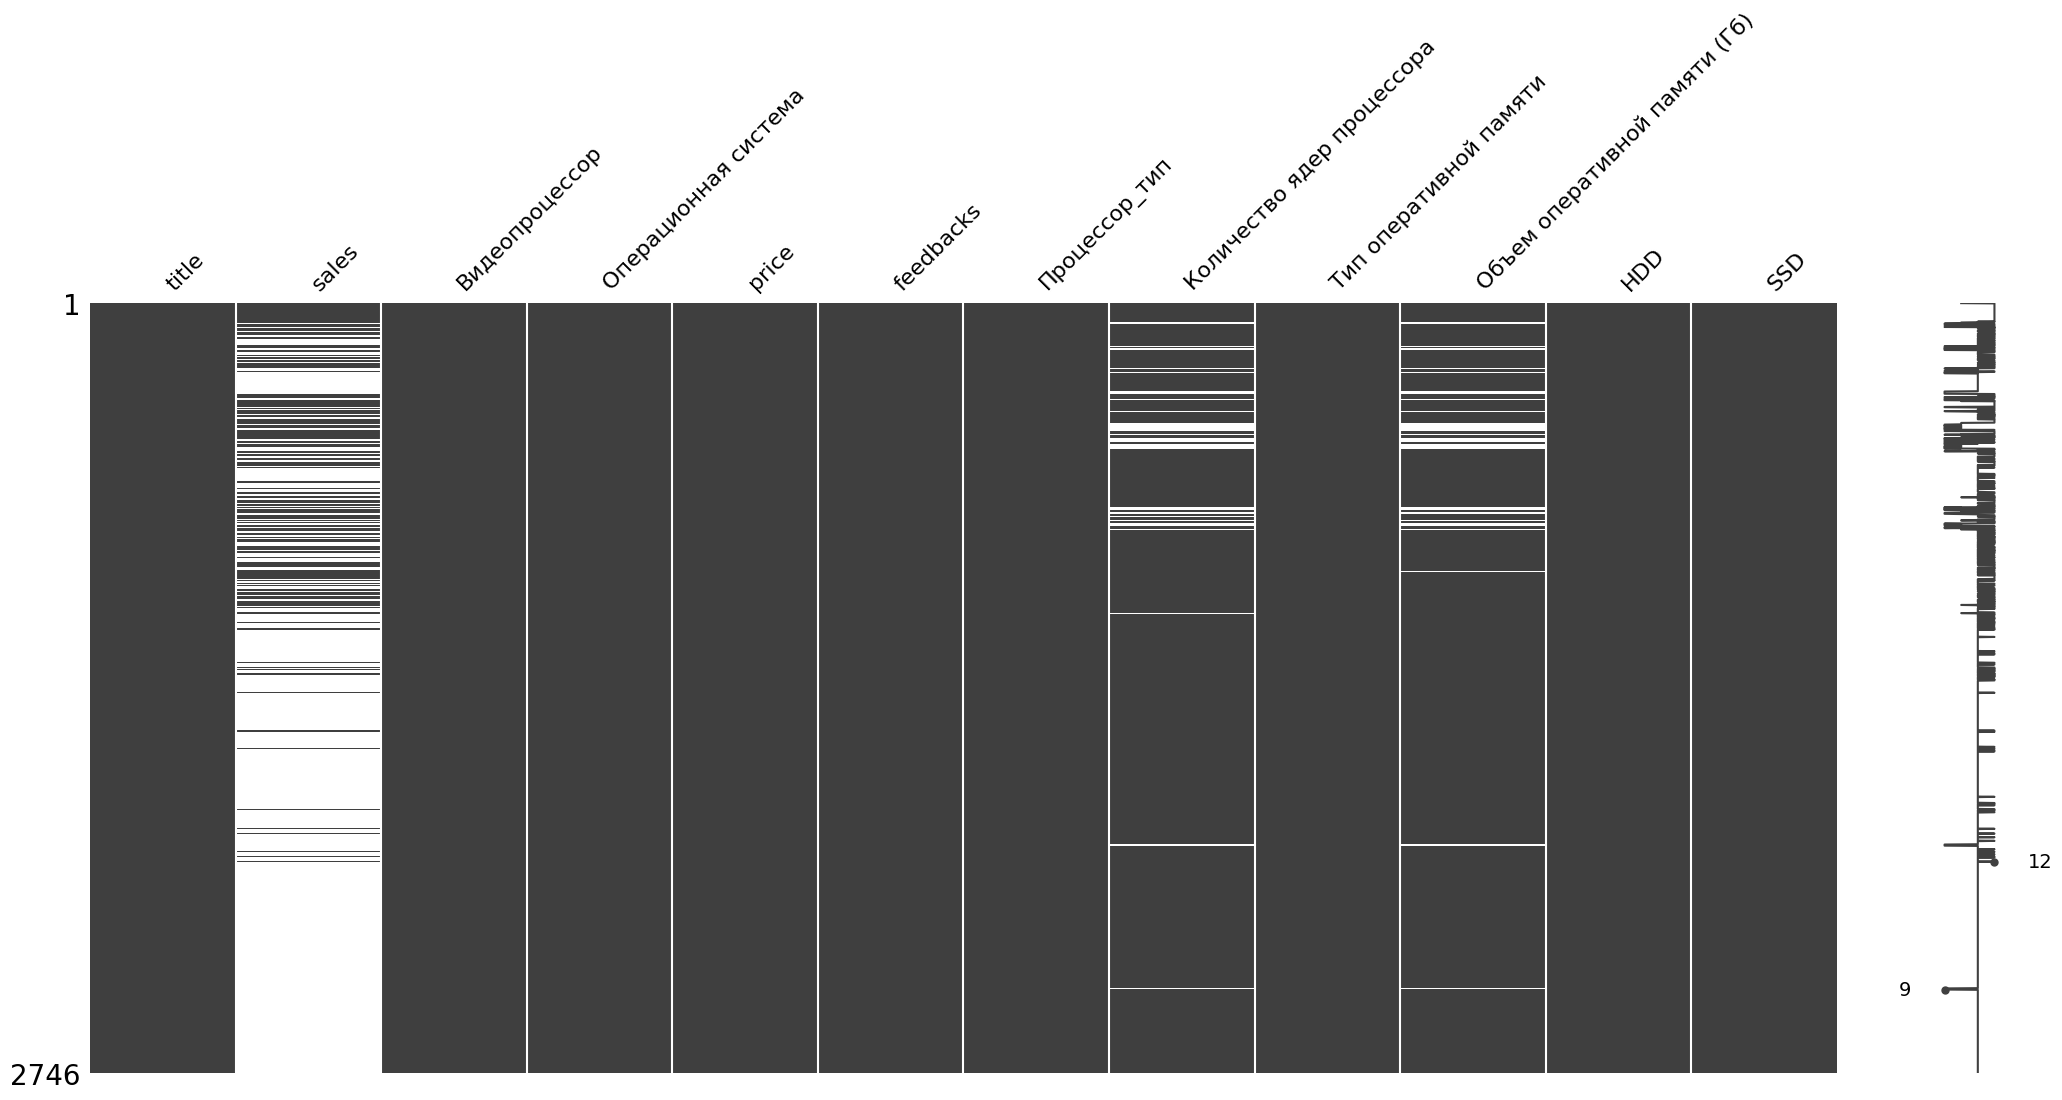

In [1468]:
# Посмотрим структуру пропусков, повторяющих структуру датасета более наглядно
# Видим, что распределение пропущенных значениц по продажам раскинулись по всему датасету
import missingno as msno
msno.matrix(clean_data)

In [1469]:
# Посмотрим распределение пустот и заполненных значений в цифрах, учитывая незаполненные значения
clean_data.sales.value_counts(dropna = False)

NaN                     2080
Купили менее 5 раз       353
Купили более 5 раз       125
Купили более 10 раз       77
Купили более 20 раз       33
Купили более 40 раз       15
Купили более 30 раз       15
Купили более 100 раз      15
Купили более 50 раз        7
Купили более 80 раз        7
Купили более 200 раз       5
Купили более 90 раз        3
Купили более 70 раз        2
Купили более 300 раз       2
Купили более 400 раз       2
Купили более 800 раз       2
Купили более 500 раз       2
Купили более 60 раз        1
Name: sales, dtype: int64

In [1470]:
# Проанализируем сколько признаков 'sales' не заполнены. при заполненных признаках с комментариями, возможно их будет правильно заполнить модой или медианой
clean_data[['sales','feedbacks']].isna().sample(10)

,sales,feedbacks
2815,True,False
3769,True,False
187,True,False
4401,True,False
2740,True,False
4273,True,False
4291,True,False
582,True,False
4443,True,False
4480,True,False


In [1471]:
# Предположу, что эти 86 строчек именно с пропущенными заначениями, т.к. имеют хотя бы 1 отзыв,
# Без заказа товара, даже если он и не был выкуплен, отзыв оставить было бы нельзя, а значит покупателя привлек товар, и он его заказал
filter = (clean_data['sales'].isna()) & ( clean_data['feedbacks'] > 0)
not_empty_sales = clean_data[filter]
not_empty_sales.sort_index(ascending=True)
not_empty_sales

,title,sales,Видеопроцессор,Операционная система,price,feedbacks,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),HDD,SSD
553,компьютер raskat standart 500,NaN,AMD Radeon Vega 8,отсутствует,29737,1,AMD Ryzen 5,6.0,DDR 4,8.0,0.0,240.0
941,компьютер monox cleanwoptiv1,NaN,не заполнено,Windows 10 Pro,18814,1,Intel Core i5,4.0,DDR 3,4.0,0.0,120.0
1086,игровой компьютер robotcomp star 2.0 v3,NaN,NVIDIA GeForce GTX 1650,Windows 10 Pro,43366,4,AMD Athlon,2.0,DDR 4,16.0,0.0,480.0
1112,игровой компьютер robotcomp м16 2.0 v1 plus,NaN,NVIDIA GeForce GTX 1660,windows пробная,69131,2,Intel Core i5,6.0,DDR 4,32.0,0.0,960.0
1117,игровой компьютер infinite space 2,NaN,NVIDIA GeForce RTX 3050,Windows 10 Pro,77752,1,AMD Ryzen 5,6.0,DDR 4,32.0,3000.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4235,игровой компьютер bk 3304 white,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
4236,игровой компьютер bk 3304 white,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
4237,игровой компьютер bk 3304 white,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
4238,игровой компьютер bk 3304 white,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0


In [1472]:
# Так как, связаться с заказчиком возможности нет, предлагаю удалить все пустые значения по продажам, для дальнейшего анализа
clean_data.dropna(subset=['sales'], inplace=True)

In [1473]:
# Сделаем обзор датасета
clean_data.shape


(666, 12)

In [1474]:
# Теперь нужно объединить исходный датасет и not_empty_sales, который я отфильтровала с незаполненными значениями про продажам и наличием фидбэков
# Получаем 752 наблюдения, из которых в графе 'sales' у нас 86 записей с незаполненными значениями, которые я заменю
clean_data = clean_data.append(not_empty_sales)


<ipython-input-1474-f4a1b542b52d>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clean_data = clean_data.append(not_empty_sales)


In [1475]:
# Отсортирую по индексам, чтобы вс строки вернулись на свои места, для дальнейшего заполнения пропусков, и перезапишу индексы сразу

clean_data = clean_data.sort_index()
clean_data.reset_index(drop=True, inplace=True)
clean_data

,title,sales,Видеопроцессор,Операционная система,price,feedbacks,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),HDD,SSD
0,офисный компьютер robotcomp казначей v1,Купили более 10 раз,Intel UHD Graphics 630,windows пробная,39237,1,Intel Core i5,6.0,DDR 4,8.0,0.0,480.0
1,игровой компьютер robotcomp м16 2.0 v1,Купили более 200 раз,NVIDIA GeForce GTX 1660,windows пробная,76188,94,Intel Core i5,6.0,DDR 4,16.0,0.0,960.0
2,игровой компьютер robotcomp m-16 v1,Купили более 40 раз,NVIDIA GeForce GTX 1650,windows пробная,55625,12,Intel Core i5,6.0,DDR 4,16.0,0.0,480.0
3,игровой компьютер robotcomp анаконда 2.0 v1,Купили более 5 раз,NVIDIA GeForce RTX 3070,windows пробная,128284,4,Intel Core i5,10.0,DDR 4,16.0,0.0,960.0
4,игровой компьютер robotcomp f22 raptor v1,Купили более 30 раз,NVIDIA GeForce GTX 1650,windows пробная,48386,9,Intel Core i3,4.0,DDR 4,16.0,0.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...
747,игровой компьютер bk 3304 white,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
748,игровой компьютер bk 3304 white,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
749,игровой компьютер bk 3304 white,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
750,игровой компьютер bk 3304 white,NaN,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0


In [1476]:
# Сделаем обзор получившегося датасета
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   title                          752 non-null    object 
 1   sales                          666 non-null    object 
 2   Видеопроцессор                 752 non-null    object 
 3   Операционная система           752 non-null    object 
 4   price                          752 non-null    int64  
 5   feedbacks                      752 non-null    int64  
 6   Процессор_тип                  752 non-null    object 
 7   Количество ядер процессора     683 non-null    float64
 8   Тип оперативной памяти         752 non-null    object 
 9   Объем оперативной памяти (Гб)  685 non-null    float64
 10  HDD                            752 non-null    float64
 11  SSD                            752 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 7

In [1477]:
# Выведем уникальные значения
clean_data.sales.unique()

array(['Купили более 10 раз', 'Купили более 200 раз',
       'Купили более 40 раз', 'Купили более 5 раз', 'Купили более 30 раз',
       'Купили более 20 раз', 'Купили более 50 раз', 'Купили менее 5 раз',
       'Купили более 400 раз', 'Купили более 500 раз',
       'Купили более 100 раз', 'Купили более 80 раз',
       'Купили более 800 раз', 'Купили более 90 раз',
       'Купили более 300 раз', 'Купили более 70 раз', nan,
       'Купили более 60 раз'], dtype=object)

In [1478]:
# Видим 17 разных групп продаж
clean_data.sales.nunique()

17

In [1479]:
# посмотрим распределение данных по продажам
clean_data.sales.value_counts()

Купили менее 5 раз      353
Купили более 5 раз      125
Купили более 10 раз      77
Купили более 20 раз      33
Купили более 40 раз      15
Купили более 30 раз      15
Купили более 100 раз     15
Купили более 50 раз       7
Купили более 80 раз       7
Купили более 200 раз      5
Купили более 90 раз       3
Купили более 70 раз       2
Купили более 300 раз      2
Купили более 400 раз      2
Купили более 800 раз      2
Купили более 500 раз      2
Купили более 60 раз       1
Name: sales, dtype: int64

In [1480]:
# После изучения в интернете разных способов заполнения пропусков
# Самым приелимым я считаю метод interpolate(), так как заполнение самым часто встречаемым показателем, мне кажется, сильно изменит картинку для анализа
clean_data = clean_data.interpolate(method='pad')
clean_data


,title,sales,Видеопроцессор,Операционная система,price,feedbacks,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),HDD,SSD
0,офисный компьютер robotcomp казначей v1,Купили более 10 раз,Intel UHD Graphics 630,windows пробная,39237,1,Intel Core i5,6.0,DDR 4,8.0,0.0,480.0
1,игровой компьютер robotcomp м16 2.0 v1,Купили более 200 раз,NVIDIA GeForce GTX 1660,windows пробная,76188,94,Intel Core i5,6.0,DDR 4,16.0,0.0,960.0
2,игровой компьютер robotcomp m-16 v1,Купили более 40 раз,NVIDIA GeForce GTX 1650,windows пробная,55625,12,Intel Core i5,6.0,DDR 4,16.0,0.0,480.0
3,игровой компьютер robotcomp анаконда 2.0 v1,Купили более 5 раз,NVIDIA GeForce RTX 3070,windows пробная,128284,4,Intel Core i5,10.0,DDR 4,16.0,0.0,960.0
4,игровой компьютер robotcomp f22 raptor v1,Купили более 30 раз,NVIDIA GeForce GTX 1650,windows пробная,48386,9,Intel Core i3,4.0,DDR 4,16.0,0.0,480.0
...,...,...,...,...,...,...,...,...,...,...,...,...
747,игровой компьютер bk 3304 white,Купили менее 5 раз,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
748,игровой компьютер bk 3304 white,Купили менее 5 раз,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
749,игровой компьютер bk 3304 white,Купили менее 5 раз,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0
750,игровой компьютер bk 3304 white,Купили менее 5 раз,NVIDIA GeForce GTX 1660,Windows 10 Pro,61264,25,Intel Core i5,6.0,DDR 4,16.0,1000.0,240.0


In [1481]:
# Закодируем значения продаж для удобства дальнейшего анализа
# Для начала создаю словарик

sales_dict = {'Купили менее 5 раз' : 1,
              'Купили более 5 раз' : 5 ,
              'Купили более 10 раз' : 10,
              'Купили более 20 раз' : 20,
              'Купили более 30 раз' : 30,
              'Купили более 40 раз' : 40,
              'Купили более 50 раз' : 50,
              'Купили более 60 раз' : 60,
              'Купили более 70 раз' : 70,
              'Купили более 80 раз' : 80,
              'Купили более 90 раз' : 90,
              'Купили более 100 раз' : 100,
              'Купили более 200 раз' : 200,
              'Купили более 300 раз' : 300,
              'Купили более 400 раз' : 400,
              'Купили более 500 раз' : 500,
              'Купили более 800 раз' : 800}


In [1482]:
# Кодируем
clean_data.sales = clean_data.sales.apply(lambda x : sales_dict[x])


In [1483]:
# перевожу в int64
clean_data.sales.astype('Int64')


0       10
1      200
2       40
3        5
4       30
      ... 
747      1
748      1
749      1
750      1
751      1
Name: sales, Length: 752, dtype: Int64

In [1484]:
# Проверю пропуски
clean_data['sales'].isna().sum()

0

In [1485]:
# Для статистического анализа сравнения групп все же закодирую категорильные признаки по комплектующим
clean_data['Видеопроцессор'].unique()

array(['Intel UHD Graphics 630', 'NVIDIA GeForce GTX 1660',
       'NVIDIA GeForce GTX 1650', 'NVIDIA GeForce RTX 3070',
       'NVIDIA GeForce RTX 3050', 'AMD Radeon Vega 7',
       'NVIDIA GeForce RTX 3080', 'AMD Radeon Vega 3',
       'NVIDIA GeForce RTX 3060', 'NVIDIA GeForce GT 1030',
       'intel UHD Graphics 750', 'Intel HD Graphics 6000', 'не заполнено',
       'Intel HD Graphics 610', 'AMD Radeon Vega 8',
       'Intel HD Graphics 630', 'NVIDIA GeForce GT 730',
       'NVIDIA Quadro T400', 'NVIDIA GeForce GTX 1050',
       'NVIDIA GeForce GT 740', 'Intel HD Graphics',
       'NVIDIA GeForce RTX 2060', 'AMD Radeon R5',
       'Intel UHD Graphics 610', 'NVIDIA', 'NVIDIA GeForce GTX 1630',
       'AMD Radeon RX 6500', 'Intel HD Graphics 2000', 'AMD',
       'NVIDIA GeForce GT 610', 'Intel UHD Graphics 605',
       'Intel UHD Graphics 600', 'AMD Radeon RX 6600',
       'Intel HD Graphics 2500', 'NVIDIA GeForce RTX 4080',
       'Intel UHD Graphics', 'AMD Radeon RX 470', 'AMD Rade

In [1486]:
# Создам копию для датасета с закодированными признаками. В основнов датасете оставлю наименования категорий для анализа топов среди комплектующих
clean_data_with_encoding = clean_data.copy()

In [1487]:
# Закодируем значения продаж для удобства дальнейшего анализа
# Для начала создаю словарик

processor_dict = {
              'не заполнено': 0,
              'Radeon': 1,
              'AMD' : 1,
              'AMD Radeon Vega 7' : 1 ,
              'AMD Radeon Vega 3' : 1,
              'AMD Radeon Vega 8' : 1,
              'AMD Radeon R5' : 1,
              'Radeon R7 350' : 1,
              'AMD Radeon RX 6500' : 1,
              'AMD Radeon RX 6600' : 1,
              'AMD Radeon RX 470' : 1,
              'AMD Radeon RX 580' : 1,
              'AMD Radeon RX 570' : 1,
              'AMD Radeon RX 550' : 1,
              'Intel UHD Graphics 630' : 2,
              'intel UHD Graphics 750' : 2,
              'Intel HD Graphics 6000' : 2,
              'Intel HD Graphics 610' : 2,
              'Intel HD Graphics 630' : 2,
              'Intel HD Graphics' : 2,
              'Intel UHD Graphics 610' : 2,
              'Intel HD Graphics 2000' : 2,
              'Intel UHD Graphics 605' : 2,
              'Intel UHD Graphics 600' : 2,
              'Intel HD Graphics 2500' : 2,
              'Intel UHD Graphics' : 2,
              'NVIDIA GeForce GTX 1660' : 3,
              'NVIDIA GeForce GTX 1650' : 3,
              'NVIDIA GeForce RTX 3070' : 3,
              'NVIDIA GeForce RTX 3050' : 3,
              'NVIDIA GeForce RTX 3080' : 3,
              'NVIDIA GeForce RTX 3060' : 3,
              'NVIDIA GeForce GT 1030' : 3,
              'NVIDIA Quadro T400' : 3,
              'NVIDIA GeForce GTX 1050' : 3,
              'NVIDIA GeForce GT 730' : 3,
              'NVIDIA GeForce GT 740' : 3,
                'NVIDIA GeForce RTX 2060' : 3,
                'NVIDIA' : 3,
              'NVIDIA GeForce GTX 1630' : 3,
              'NVIDIA GeForce GT 610' : 3,
                  'NVIDIA GeForce RTX 4080': 3,
                  'NVIDIA GeForce GTX 650' : 3,
                  'NVIDIA GeForce GTX 750': 3}

In [1488]:
# Кодируем
clean_data_with_encoding['Видеопроцессор'] = clean_data_with_encoding['Видеопроцессор'].apply(lambda x : processor_dict[x])

In [1489]:
# Так же закодирую операционные системы
clean_data_with_encoding['Операционная система'].value_counts()

Windows 10 Pro             469
отсутствует                121
windows пробная             99
Windows 10                  18
Windows 11                  13
windows 10 trial            10
Windows                      6
Windows 11 Pro               5
Windows 10 Home пробная      3
Windows 11 Home              3
Free DOS                     2
Windows 10 Home              1
Windows пробная версия       1
Microsoft Windows 11         1
Name: Операционная система, dtype: int64

In [1490]:
op_dict = {
              'отсутствует': 0,
              'windows пробная': 1,
              'Windows' : 1,
              'Windows 10 Home пробная' : 1,
              'Windows пробная версия' : 1,
              'Windows 10' : 2,
              'Windows 10 Pro' : 2 ,
              'Windows 10 Home' : 2,
              'windows 10 trial' : 2,
              'Windows 11 Home' : 3,
              'Windows 11 Pro' : 3,
              'Windows 11' : 3,
              'Microsoft Windows 11' : 3,
              'Free DOS' : 3}

In [1491]:
clean_data_with_encoding['Операционная система'] = clean_data_with_encoding['Операционная система'].apply(lambda x : op_dict[x])

In [1492]:
# Осталось закодировать тип процессора и тип оперативной памяти
clean_data_with_encoding['Процессор_тип'].value_counts()

Intel Core i5                           199
AMD Ryzen 5                             144
Intel Core i3                           140
Intel Core i7                            82
не заполнено                             73
AMD Athlon                               32
AMD A6                                   19
Intel Pentium                            16
AMD Ryzen 3                              11
Intel Core i9                             9
Intel Xeon                                5
AMD Ryzen 7                               5
Intel Celeron                             4
AMD Radeon RX 570                         2
6010                                      1
Intel Core 12400F                         1
8 ядер                                    1
Intel 4 ядра                              1
Gemini Lake Refresh J4115                 1
AMD E1-6010                               1
AMD RYZEN 4600g Vega7 арт. 100343717      1
Intel N5105                               1
AMD Ryzen 6                     

In [1493]:
processor_type_dict = {
              'не заполнено': 0,
              'Intel Core i5': 1,
              'Intel Core i3' : 1,
              'Intel Core i7' : 1,
              'Intel Pentium' : 1,
              'Intel Core i9' : 1,
              'Intel Xeon' : 1 ,
              'Intel Celeron' : 1,
              'Intel Core 12400F' : 1,
              'Intel 4 ядра' : 1,
              'Intel N5105' : 1,
              'Intel E3' : 1,
              'AMD Ryzen 5' : 2,
              'AMD Athlon' : 2,
              'AMD A6' : 2,
              'AMD Ryzen 3' : 2,
              'AMD Ryzen 7' : 2,
              'AMD Radeon RX 570' : 2,
              'AMD E1-6010' : 2,
              'AMD RYZEN 4600g Vega7 арт. 100343717' : 2,
              'AMD Ryzen 6' : 2,
              'AMD RYZEN 4600g Vega7 арт. 143553804' : 2,
              '6010' : 3,
              '8 ядер' : 3,
              'Gemini Lake Refresh J4115' : 3}

In [1494]:
clean_data_with_encoding['Процессор_тип'] = clean_data_with_encoding['Процессор_тип'].apply(lambda x : processor_type_dict[x])

In [1495]:
clean_data_with_encoding['Тип оперативной памяти'].value_counts()

DDR 4           655
не заполнено     75
DDR 3            21
DDR 5             1
Name: Тип оперативной памяти, dtype: int64

In [1496]:
Type_of_RAM_dict = {
              'не заполнено': 0,
              'DDR 3': 1,
              'DDR 4' : 2,
              'DDR 5' : 1}

In [1497]:
clean_data_with_encoding['Тип оперативной памяти'] = clean_data_with_encoding['Тип оперативной памяти'].apply(lambda x : Type_of_RAM_dict[x])


######**Разведочный и статисчический анализ**

Неграфический и графический анализ количественных признаков

Первым делом нужно определить типы данных + шкала по каждому наблюдению

*   title - категориальный тип + дискретная шкала
*   sales -  количественный тип + непрерывная шкала
*   Видеопроцессор -категориальный тип + дискретная шкала
*   Операционная система - категориальный тип + дискретная
*   price - количественный тип + непрерывная шкала
*   feedbacks - категориальный тип + дискретная шкала
*   Процессор_тип - категориальный тип + дискретная шкала
*   Количество ядер процессора - количественный тип + дискретная шкала
*   Тип оперативной памяти - категориальный тип + дискретная шкала
*   Объем оперативной памяти (Гб) - количественный тип + дискретная шкала
*   HDD - количественный тип + дискретная шкала
*   SSD - количественный тип + дискретная шкала



In [1498]:
# Проанализируем количественные признаки
# Воспользуюсь сразу методом describe() для обзора всех характеристик
# Скорее всего компьютеры с такой низкой ценой как 254 рубля - это выбросы. max цена 214954 рубля. в среднем компьютеры продаются по 48 тысяч рублей.
# 75% данных  - это продажи с не больше, чем 5 фидбэками от клиентов.
# Количество ядер процессора - можно сказать, что наименьшее кол-во - 2 ядра, максимальное - 16 ядер.
# min Объем оперативной памяти - 4 гб, max - 64 гб, можно по среднему сказать, что покупают не часто с большим объемом.
# Пока нельзя точно сказать с каким типом хранения HDD или SSD покупают чаще, или совмещенный.Вижу, что максимальные и средние показатели у дисков и флеш-накопитилей разные.
clean_data.describe()

,sales,price,feedbacks,Количество ядер процессора,Объем оперативной памяти (Гб),HDD,SSD
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,15.476064,59445.632979,10.597074,5.973404,19.194149,248.412234,503.587766
std,59.106615,35447.365367,28.633803,2.994773,11.275727,499.189890,345.353244
min,1.000000,254.000000,0.000000,2.000000,4.000000,0.000000,0.000000
25%,1.000000,34987.000000,0.000000,4.000000,16.000000,0.000000,256.000000
50%,1.000000,47869.500000,1.000000,6.000000,16.000000,0.000000,480.000000
75%,10.000000,76072.500000,5.000000,6.000000,32.000000,0.000000,512.000000
max,800.000000,214954.000000,296.000000,16.000000,64.000000,4000.000000,2048.000000


In [1499]:
# Обозначу сразу целевую переменную, т.к. нас интересуют бОльшие продажи, это будет 'sales'
# Посмотрим ассиметрию числовых значений и эксцесс
# Вижу, что все значения имеют оложительную асимметрию, кот. указывает на то, что хвост находится на правой стороне распределения,
# которая простирается в сторону более положительных значений. Распределение имеет положительную или левостороннюю ассиметричность
clean_data.skew()

<ipython-input-1499-aa7f5aee91d5>:5: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_data.skew()


sales                            9.030551
price                            1.518408
feedbacks                        5.130942
Количество ядер процессора       1.392288
Объем оперативной памяти (Гб)    1.675188
HDD                              2.275990
SSD                              1.550310
dtype: float64

In [1500]:
# Эксцесс в большинстве признаков является лептокуртическим , что означает, что оно имеет тенденцию производить больше выбросов, чем нормальное распределение.
# И только у 3 признаков значение < 3, что говорит о меньшем количестве выбросов, чем в нормальном распределении.
clean_data.kurtosis()

<ipython-input-1500-40d8ac5252d7>:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  clean_data.kurtosis()


sales                            99.435402
price                             2.742378
feedbacks                        34.676836
Количество ядер процессора        2.343906
Объем оперативной памяти (Гб)     4.045365
HDD                               6.845115
SSD                               4.726863
dtype: float64

In [1501]:
# тест д'Агостино показывает нам, что p-value < 0.05, что мы отвергаем гипотезу H0 о принадлежности выборки к нормальной генеральной совокупности
# к данной выборке мы будем применять непараметрический статистический критерий
stats.normaltest(clean_data['price'])

NormaltestResult(statistic=216.1062563826106, pvalue=1.1833757738658792e-47)

In [1502]:
# # тест д'Агостино показывает нам, что p-value < 0.05, что мы отвергаем гипотезу H0 о принадлежности выборки к нормальной генеральной совокупности
# к данной выборке мы будем так же применять непараметрический статистический критерий
stats.normaltest(clean_data['sales'])

NormaltestResult(statistic=1155.3811310109725, pvalue=1.2947179031534942e-251)

In [1503]:
# Мы видим, что распределение противоречит нормальному распределению Шапиро-Уилка, т.к. pvalue < 0.05
stats.shapiro(clean_data['price'])

ShapiroResult(statistic=0.8701397180557251, pvalue=1.714930162624151e-24)

In [1504]:
# Тот же результат получим по значению колонки с отзывами
stats.shapiro(clean_data['feedbacks'])

ShapiroResult(statistic=0.3947526216506958, pvalue=2.6624670822171524e-44)

In [1505]:
# Тот же результат получим по значению rоличество ядер процессора
stats.shapiro(clean_data['Количество ядер процессора'])

ShapiroResult(statistic=0.8218477368354797, pvalue=4.605354460944215e-28)

In [1506]:
# Тот же результат получим по признаку 'Объем оперативной памяти (Гб)'
stats.shapiro(clean_data['Объем оперативной памяти (Гб)'])

ShapiroResult(statistic=0.7598047852516174, pvalue=1.125538426999912e-31)

In [1507]:
# По признаку с жесткими дисками мы так же отклоняем нулевую гипотезу о нормальности распределения, т.к. pvalue < 0.05
stats.shapiro(clean_data['HDD'])

ShapiroResult(statistic=0.5401878356933594, pvalue=2.551988711289784e-40)

In [1508]:
# По признаку с флеш-накопителями такая же ситуация
# Ни одно из распределений числовых признаков не относится к нормальному распределению
stats.shapiro(clean_data['SSD'])

ShapiroResult(statistic=0.8128945827484131, pvalue=1.2200406289534782e-28)

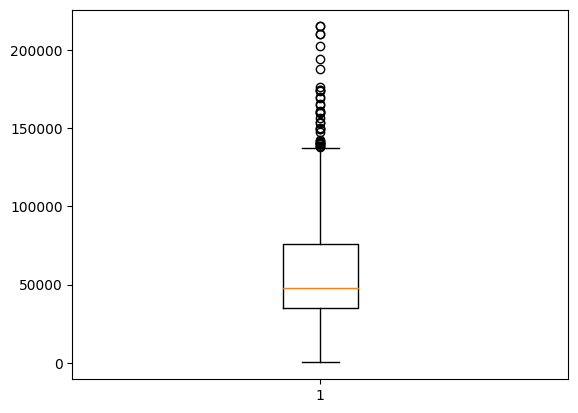

In [1509]:
# На ящике с усами вижу, что стандартные значения находятся в диапазоне от 34987 до 76072 рублей, соответственно 25-му и 75-му процентилю
# значения выше 140000 руб. являются выбросами, их много. Не считаю нужным удалять выбросы, в данном случае, вся полезная информация может находиться в выбросах.
price = clean_data['price']
plt.boxplot(price)
plt.show()

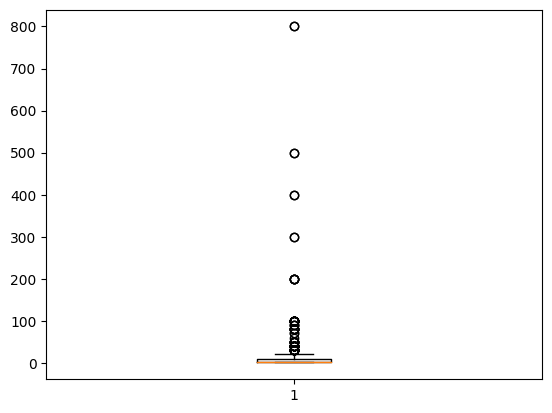

In [1510]:
# Так же вижу много выбросов, но скорее всего, по продажам, все интересующие характеристики компьютеров будут именно в выбросах.
sales = clean_data['sales']
plt.boxplot(sales)
plt.show()

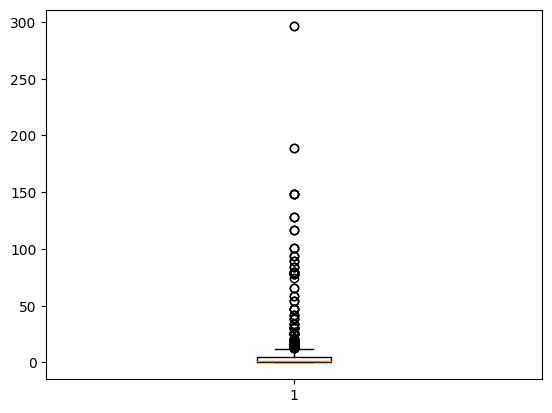

In [1511]:
# Проанализирую боксплот с отзывами
# Очень много выбросов, т.к. 75% отзывов 5 и менее, то много и выходят за границы типичных показателей
feedbacks = clean_data['feedbacks']
plt.boxplot(feedbacks)
plt.show()

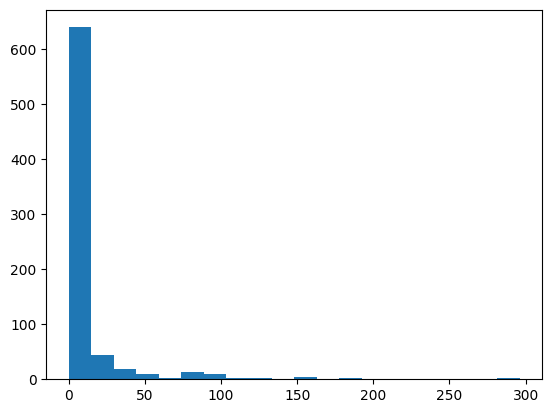

In [1512]:
# В среднем до 5 отзывов на товары оставляют покупатели
plt.hist(feedbacks, bins=20)
plt.show()

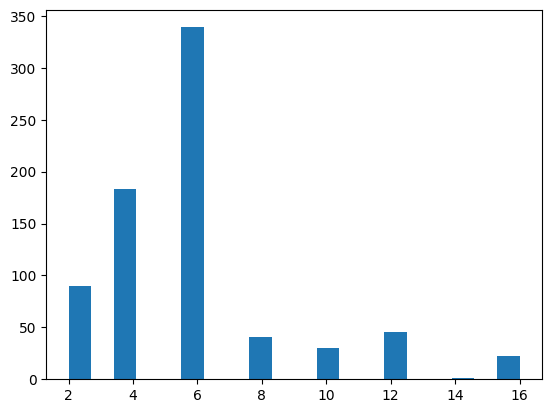

In [1513]:
# Проанализирую количество ядер процессора
# Можно сказать, что на онлайн-платформе больше компьютеров с 6 ядрами
number_of_processor_cores = clean_data['Количество ядер процессора']
plt.hist(number_of_processor_cores, bins=20)
plt.show()

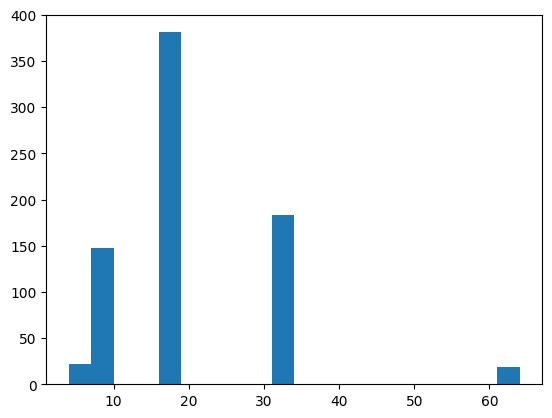

In [1514]:
# Проанализирую объем оперативной памяти (Гб)
# Больше всего на онлайн-платформе из продаваемых позиций представленно компьютеров с объемом памяти 20 Гб
volume = clean_data['Объем оперативной памяти (Гб)']
plt.hist(volume, bins=20)
plt.show()

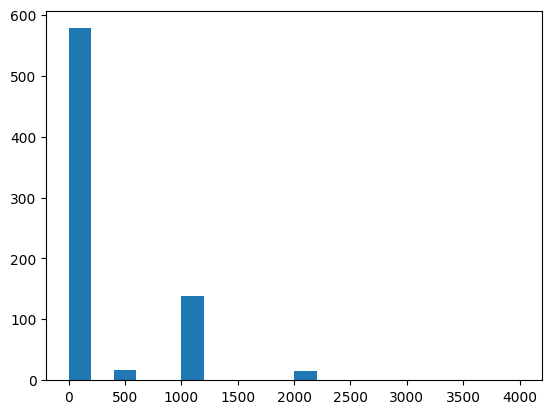

In [1515]:
# С типом памяти - жесткий диск много нулевых, что может говорить о пустых значениях и выборе покупателями в пользу флеш-накопителей
HDD = clean_data['HDD']
plt.hist(HDD, bins=20)
plt.show()


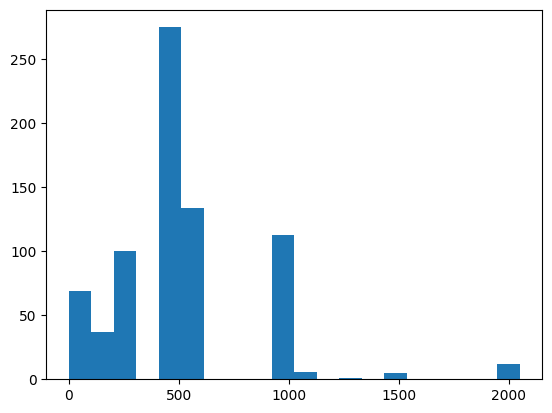

In [1516]:
# Чаще выбирают флеш-накопители с памятью 500 гб
SSD = clean_data['SSD']
plt.hist(SSD, bins=20)
plt.show()


In [1517]:
 # Проанализируем корреляцию количественных показателей
 # Больше всего нас интересует связь целевой переменной продаж с остальными признаками
 # Как мы видим, продажи не тесно связаны ни с одним показателем, скорее всего связь с продажами складывается из суммы факторов процессор+тип_ядра+опер.память и т.д.
 # Cвязь целевой переменной с фидбеками является скорее следственным фактором, чем больше продаж - тем больше отзывов могут оставить покупатели
 # Все таки фидбэки можно было вырезать на стадии чистки
 # Можем наблюдать тесную связь у цены и количества ядер процессора, что логично, так же у цены и дисков HHD и SSD, и уже меньше, но присутствует связь у цены и объема опер.памяти
 # Получается, цена растет с с увеличением показателей комплектующих: чем больше ядер процессора, больше опер.памяти, с увеличением объемов дисков HDD, SSD
 clean_data[['sales','price','feedbacks','Количество ядер процессора','Объем оперативной памяти (Гб)','HDD','SSD']].corr(method='pearson')

,sales,price,feedbacks,Количество ядер процессора,Объем оперативной памяти (Гб),HDD,SSD
sales,1.000000,-0.112727,0.452137,-0.094155,-0.090321,-0.050511,-0.035420
price,-0.112727,1.000000,-0.156792,0.702649,0.416924,0.542703,0.502605
feedbacks,0.452137,-0.156792,1.000000,-0.094349,-0.098791,-0.083446,0.009212
Количество ядер процессора,-0.094155,0.702649,-0.094349,1.000000,0.429176,0.478216,0.327209
Объем оперативной памяти (Гб),-0.090321,0.416924,-0.098791,0.429176,1.000000,0.377940,0.315450
HDD,-0.050511,0.542703,-0.083446,0.478216,0.377940,1.000000,0.018680
SSD,-0.035420,0.502605,0.009212,0.327209,0.315450,0.018680,1.000000


In [1518]:
 # При ранговой корреляции Спирмена немного другие значения
 # Тут продажи теснее связаны с фидбэками, что логично, чем больше заказов на товар - тем больше отзывов оставляют покупатели
 # Цена так же тесно связана с количеством ядер процессора, так же с объемом оперативной памяти и c дисками HDD, SSD
 # Тут более четко просматривается связь количества ядер процессора с ценой,объемом опер.памяти

 clean_data[['sales','price','feedbacks','Количество ядер процессора','Объем оперативной памяти (Гб)','HDD','SSD']].corr(method='spearman')

,sales,price,feedbacks,Количество ядер процессора,Объем оперативной памяти (Гб),HDD,SSD
sales,1.000000,-0.159741,0.637744,-0.077415,-0.073487,-0.081047,0.025750
price,-0.159741,1.000000,-0.162818,0.667308,0.520981,0.450992,0.522557
feedbacks,0.637744,-0.162818,1.000000,-0.044374,-0.014695,-0.086761,0.150685
Количество ядер процессора,-0.077415,0.667308,-0.044374,1.000000,0.561873,0.393512,0.382843
Объем оперативной памяти (Гб),-0.073487,0.520981,-0.014695,0.561873,1.000000,0.340890,0.423104
HDD,-0.081047,0.450992,-0.086761,0.393512,0.340890,1.000000,0.044257
SSD,0.025750,0.522557,0.150685,0.382843,0.423104,0.044257,1.000000


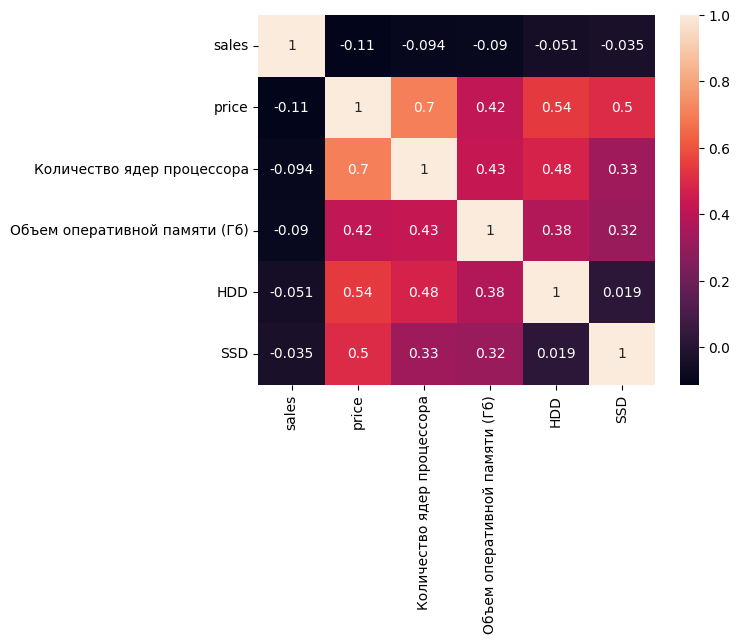

In [1519]:
num = ['sales','price','Количество ядер процессора','Объем оперативной памяти (Гб)','HDD','SSD']
hm = sns.heatmap(clean_data[num].corr(), annot=True)

In [1520]:
# Cтатистически не значимая связь у продаж и цены, значит покупатели смотрят не только на цену, планируя покупку
scipy.stats.pearsonr(clean_data.sales, clean_data.price)

PearsonRResult(statistic=-0.1127274959107625, pvalue=0.0019614098409444117)

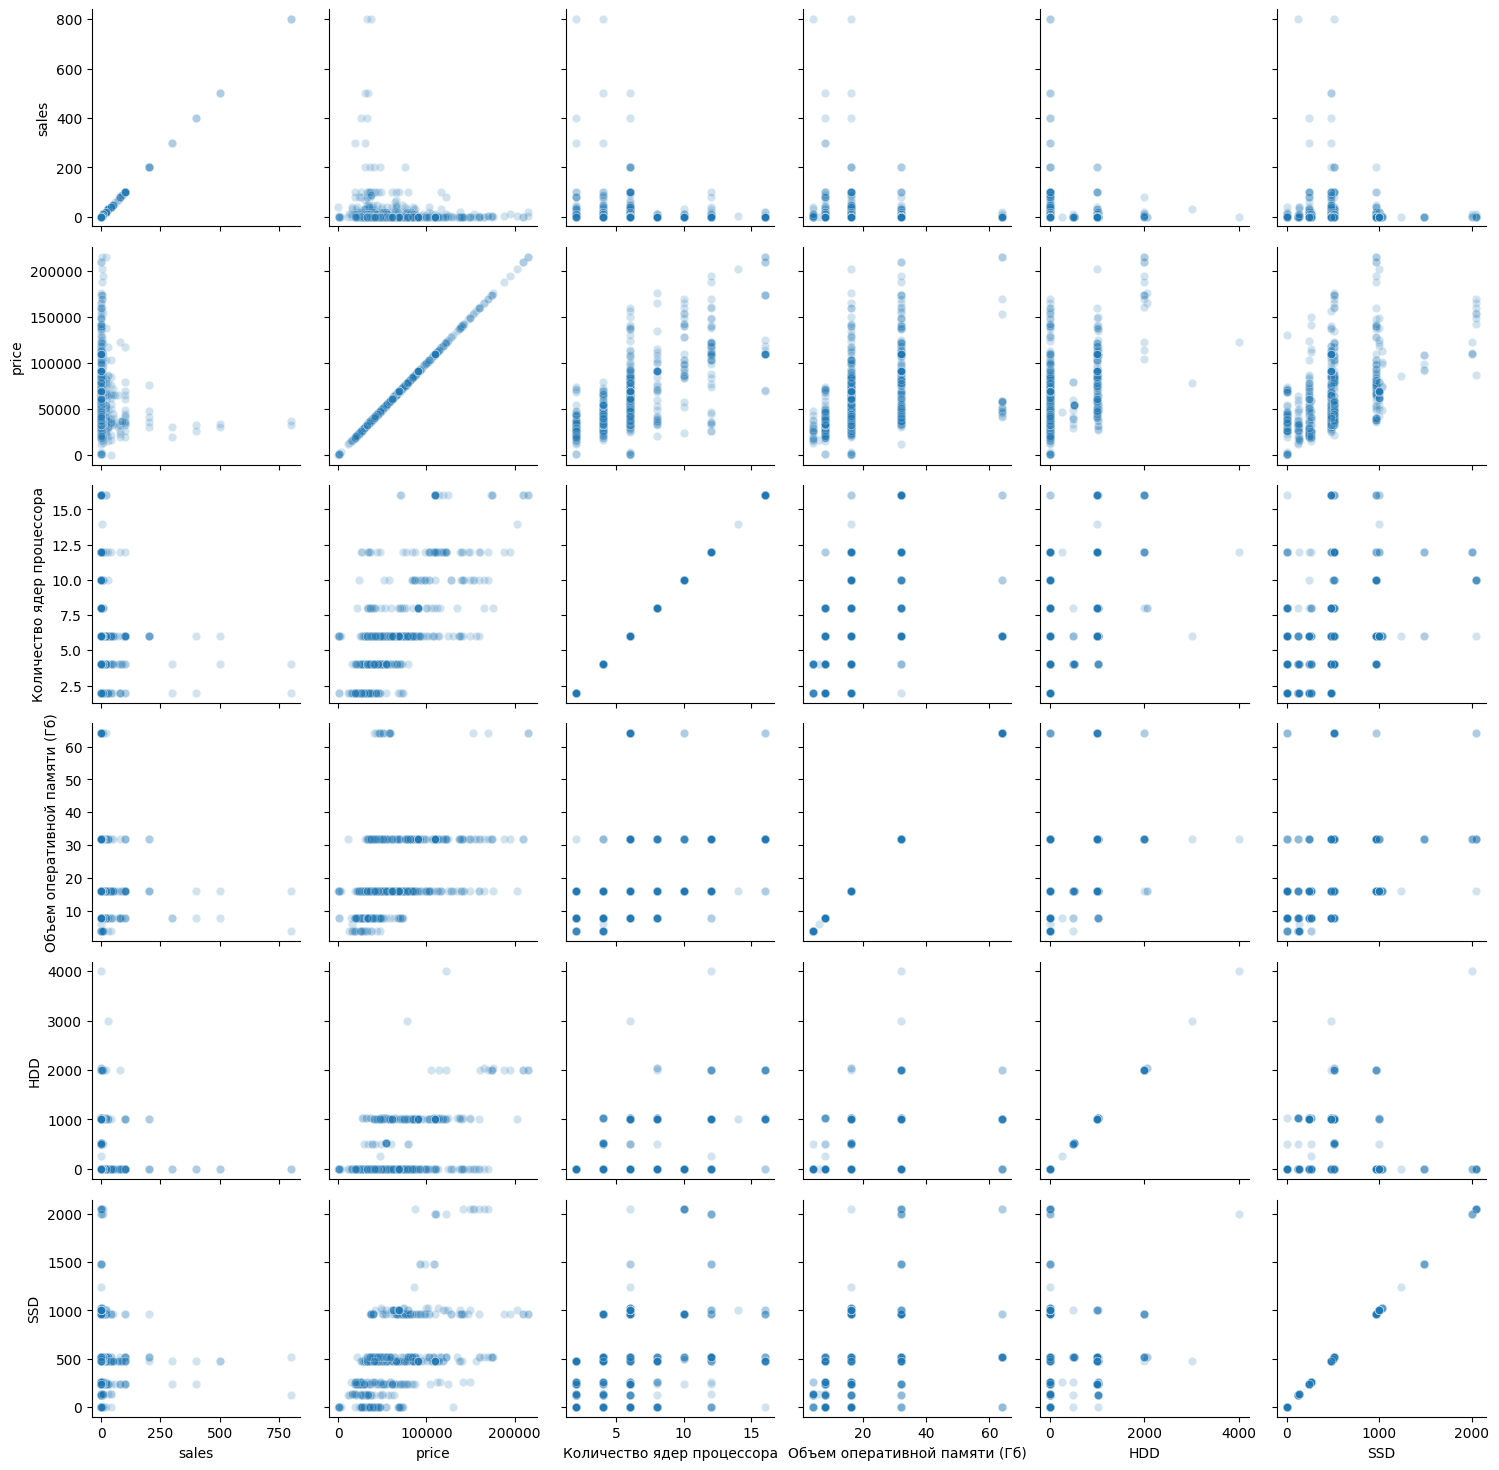

In [1521]:
# Посмотрим взаимосвязи числовых признаков наглядно
# Очень много выбросов, не наблюдаю особых взаимосвязей, кроме цены и с количеством ядер процессора, так же с объемом оперативной памяти и c дисками HDD, SSD
# Об этой выявленной взаимосвязи писала выше
g = sns.PairGrid(clean_data[['sales','price','Количество ядер процессора','Объем оперативной памяти (Гб)','HDD','SSD']])
g.map(sns.scatterplot, alpha=0.2)

Выводы по разделу:


> Проанализировав количественные показатели, могу сказать следущее:
 сильной корреляции у целевого показателя продаж не выявлено ни с одним из числовых признаков.   Из статистического анализы цены с такими комплектующими как: количество ядер процессора, объем оперативной памяти и диски HDD, SSD, выявлена сильная корреляционная связь,т.е. с ростом показателей этих комплектующих - растет и цена на товар.


###**Анализ категориальных признаков**

In [1522]:
# В названиях, конечно, много муросных наименований, но все равно проанализируем категории
# из 474 наименований, чаще всего встречается игровой компьютер roo24 gaming s4 plus
# уникальные значения выводить нет смысла, да в своем анализе, не думаю, что буду смотреть на названия
clean_data['title'].describe()

count                                        752
unique                                       474
top       игровой компьютер roo24 gaming s4 plus
freq                                          16
Name: title, dtype: object

In [1523]:
# Проанализирую видеопроцессоры
# Уже меньше наименований по этому наблюдению
# AMD Radeon Vega 7 - чаще всего встречается на онлайн-платформе из товаров с продажами
clean_data['Видеопроцессор'].describe()

count                   752
unique                   43
top       AMD Radeon Vega 7
freq                    100
Name: Видеопроцессор, dtype: object

In [1524]:
# По распределению значений можно сказать, что на платформе много единичных случаев наименований видеопроцессоров
clean_data['Видеопроцессор'].value_counts()

AMD Radeon Vega 7          100
NVIDIA GeForce GT 1030      92
не заполнено                84
NVIDIA GeForce RTX 3060     84
NVIDIA GeForce RTX 3050     79
NVIDIA GeForce GTX 1650     69
NVIDIA GeForce GTX 1660     50
NVIDIA GeForce RTX 3080     25
AMD Radeon Vega 3           20
NVIDIA GeForce RTX 3070     19
AMD Radeon R5               19
NVIDIA GeForce RTX 2060     18
Intel UHD Graphics 630      14
Intel UHD Graphics 610      11
NVIDIA GeForce GTX 1050     10
AMD Radeon Vega 8            7
NVIDIA GeForce GTX 1630      6
Intel HD Graphics 630        4
Intel UHD Graphics 605       4
NVIDIA GeForce GT 730        3
Intel UHD Graphics 600       3
intel UHD Graphics 750       3
AMD Radeon RX 6500           3
AMD Radeon RX 6600           2
AMD Radeon RX 470            2
Intel HD Graphics 2500       2
AMD Radeon RX 580            2
AMD Radeon RX 570            2
NVIDIA GeForce RTX 4080      1
Radeon R7 350                1
Intel UHD Graphics           1
NVIDIA GeForce GTX 650       1
AMD Rade

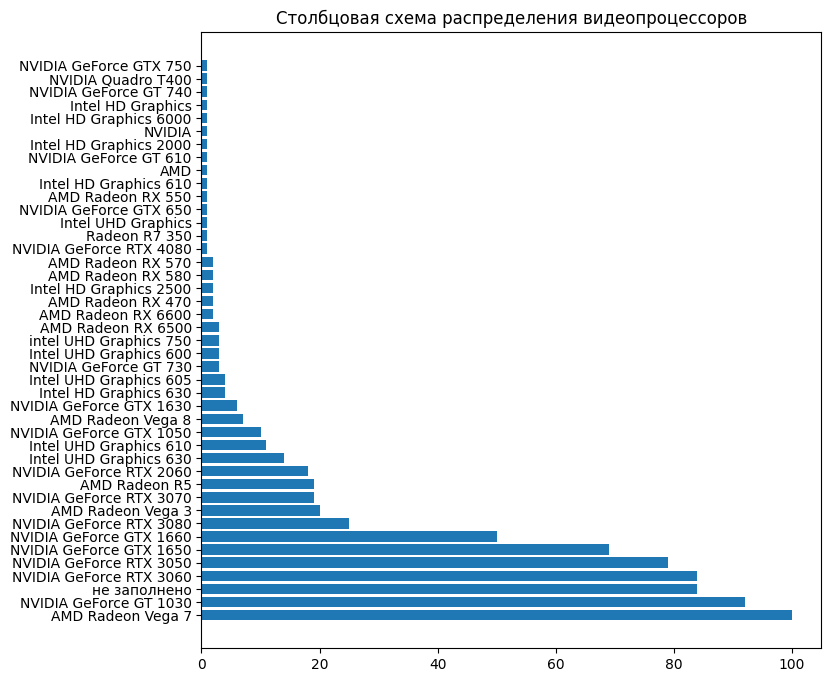

In [1525]:
# На графике видим более наглядно распределение
type_counts = clean_data['Видеопроцессор'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
plt.barh(type_counts.index, type_counts.values)
plt.title('Столбцовая схема распределения видеопроцессоров')
plt.show()

In [1526]:
# Самая распространенная операционная система - windows 10 pro на платформе
clean_data['Операционная система'].describe()

count                752
unique                14
top       Windows 10 Pro
freq                 469
Name: Операционная система, dtype: object

In [1527]:
# Большой отрыв в операционных системах между топ-1 и отсальными позициями, так же 121 значение остается неизвестным
clean_data['Операционная система'].value_counts()

Windows 10 Pro             469
отсутствует                121
windows пробная             99
Windows 10                  18
Windows 11                  13
windows 10 trial            10
Windows                      6
Windows 11 Pro               5
Windows 10 Home пробная      3
Windows 11 Home              3
Free DOS                     2
Windows 10 Home              1
Windows пробная версия       1
Microsoft Windows 11         1
Name: Операционная система, dtype: int64

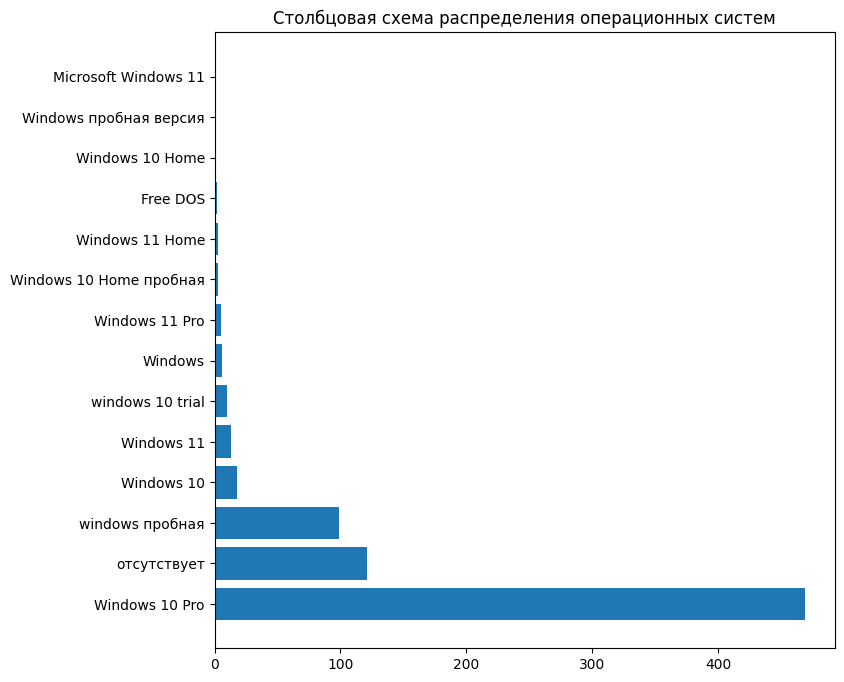

In [1528]:
# Отобразим наглядно
type_counts = clean_data['Операционная система'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
plt.barh(type_counts.index, type_counts.values)
plt.title('Столбцовая схема распределения операционных систем')
plt.show()


In [1529]:
# по типу процессора видим 25 наименований, среди которых Intel Core i5 самый распространенный
clean_data['Процессор_тип'].describe()

count               752
unique               25
top       Intel Core i5
freq                199
Name: Процессор_тип, dtype: object

In [1530]:
# Процессора типа Intel Core и AMD самые популярные из имеющихся на платформе с продажами
clean_data['Процессор_тип'].value_counts()

Intel Core i5                           199
AMD Ryzen 5                             144
Intel Core i3                           140
Intel Core i7                            82
не заполнено                             73
AMD Athlon                               32
AMD A6                                   19
Intel Pentium                            16
AMD Ryzen 3                              11
Intel Core i9                             9
Intel Xeon                                5
AMD Ryzen 7                               5
Intel Celeron                             4
AMD Radeon RX 570                         2
6010                                      1
Intel Core 12400F                         1
8 ядер                                    1
Intel 4 ядра                              1
Gemini Lake Refresh J4115                 1
AMD E1-6010                               1
AMD RYZEN 4600g Vega7 арт. 100343717      1
Intel N5105                               1
AMD Ryzen 6                     

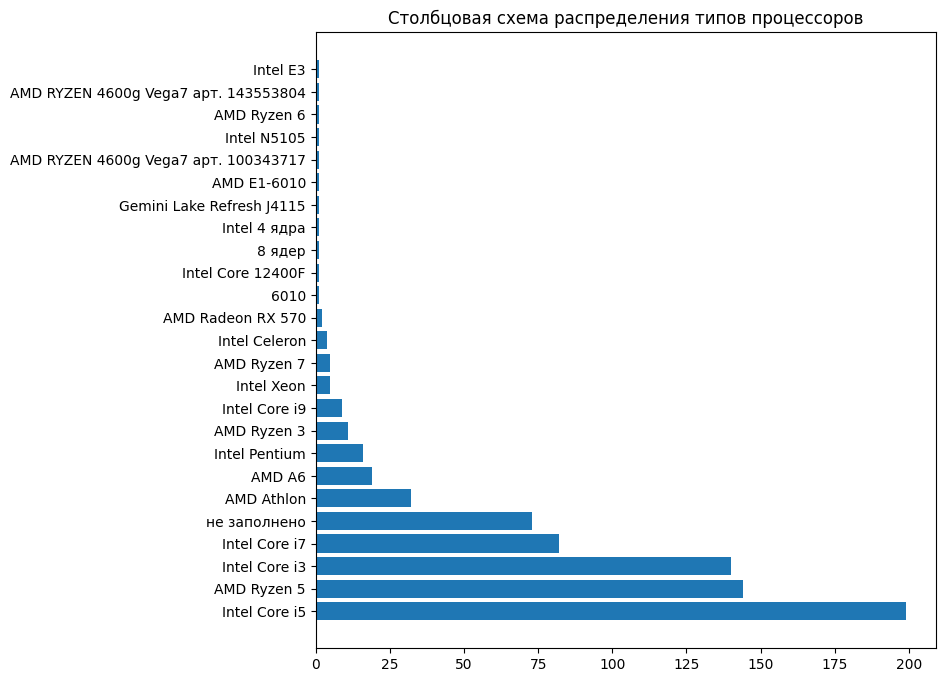

In [1531]:
# Отобразим наглядно
type_counts = clean_data['Процессор_тип'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
plt.barh(type_counts.index, type_counts.values)
plt.title('Столбцовая схема распределения типов процессоров')
plt.show()

In [1532]:
# Тип оперативной памяти имеет 4 уникальные категории
clean_data['Тип оперативной памяти'].describe()

count       752
unique        4
top       DDR 4
freq        655
Name: Тип оперативной памяти, dtype: object

In [1533]:
# По наблюдению тип оперативной памяти у нас много незаполненных значений, но все же явное пребладание компьютеров с DDR 4
clean_data['Тип оперативной памяти'].value_counts()

DDR 4           655
не заполнено     75
DDR 3            21
DDR 5             1
Name: Тип оперативной памяти, dtype: int64

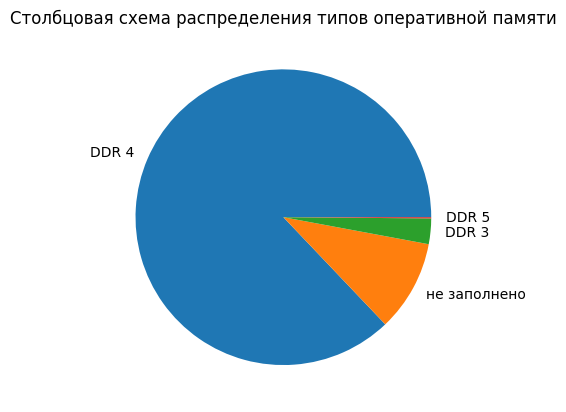

In [1534]:
# Отобразим наглядно c помощью pie(), т.к. у нас всего 4 категории
type_counts = clean_data['Тип оперативной памяти'].value_counts()
plt.pie(type_counts.values, labels=type_counts.index)
plt.title('Столбцовая схема распределения типов оперативной памяти')
plt.show()

Анализ взаимосвязи колонок


In [1535]:
# Проанализируем взаимосвязь целевой переменной по продажам с комплектущими. Продажи и видеопроцессоры
# Видим топовые позиции по продажам. Более 800 продаж: Intel HD Graphics 610, NVIDIA GeForce GT 730.
# Более 500 продаж: AMD Radeon Vega 7, NVIDIA GeForce GT 1030.
# Более 300 продаж: AMD Radeon R5.
# Более 200 продаж: NVIDIA GeForce GTX 1660
# Более 100 продаж: Intel HD Graphics 2000, NVIDIA GeForce GTX 1630	, NVIDIA GeForce GTX 1650, NVIDIA GeForce RTX 3050, NVIDIA GeForce RTX 3060
clean_data.groupby('Видеопроцессор')["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Видеопроцессор,,,,,,,,
AMD,1.0,10.000000,NaN,10.0,10.00,10.0,10.00,10.0
AMD Radeon R5,19.0,32.157895,69.335147,1.0,1.00,10.0,25.00,300.0
AMD Radeon RX 470,2.0,3.000000,2.828427,1.0,2.00,3.0,4.00,5.0
AMD Radeon RX 550,1.0,1.000000,NaN,1.0,1.00,1.0,1.00,1.0
AMD Radeon RX 570,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
AMD Radeon RX 580,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
AMD Radeon RX 6500,3.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
AMD Radeon RX 6600,2.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
AMD Radeon Vega 3,20.0,14.200000,20.839234,1.0,1.00,5.0,22.50,80.0


In [1536]:
# Продажи и операционные системы
# Более 800 продаж: Windows и незаполненные значения попали
# Более 500 продаж: Windows 10 Pro, Windows пробная
# Более 200 продаж: Windows 10 Home пробная
# Видим, что самое популярное ПО - Windows

clean_data.groupby('Операционная система')["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Операционная система,,,,,,,,
Free DOS,2.0,3.000000,2.828427,1.0,2.0,3.0,4.0,5.0
Microsoft Windows 11,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
Windows,6.0,137.166667,324.750622,1.0,1.0,5.5,10.0,800.0
Windows 10,18.0,2.833333,2.617812,1.0,1.0,1.0,5.0,10.0
Windows 10 Home,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
Windows 10 Home пробная,3.0,70.333333,112.384756,1.0,5.5,10.0,105.0,200.0
Windows 10 Pro,469.0,13.351812,42.581319,1.0,1.0,1.0,10.0,500.0
Windows 11,13.0,5.076923,5.559699,1.0,1.0,5.0,5.0,20.0
Windows 11 Home,3.0,13.333333,14.433757,5.0,5.0,5.0,17.5,30.0


In [1537]:
# Продажи и типы процессоров
# Более 800 продаж: Intel Core i7, Intel Pentium
# Более 500 продаж: AMD Ryzen 5, Intel Core i3
# Более 400 продаж: Intel Core i5
# Более 300 продаж: AMD A6, AMD Athlon
# Более 200 продаж: AMD RYZEN 4600g Vega7 арт. 100343717
# Видим, что покупатели выбирают в основном вариации из Intel Core и AMD
clean_data.groupby('Процессор_тип')["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Процессор_тип,,,,,,,,
6010,1.0,1.000000,NaN,1.0,1.00,1.0,1.0,1.0
8 ядер,1.0,5.000000,NaN,5.0,5.00,5.0,5.0,5.0
AMD A6,19.0,32.157895,69.335147,1.0,1.00,10.0,25.0,300.0
AMD Athlon,32.0,23.468750,55.470413,1.0,1.00,5.0,20.0,300.0
AMD E1-6010,1.0,10.000000,NaN,10.0,10.00,10.0,10.0,10.0
AMD RYZEN 4600g Vega7 арт. 100343717,1.0,200.000000,NaN,200.0,200.00,200.0,200.0,200.0
AMD RYZEN 4600g Vega7 арт. 143553804,1.0,10.000000,NaN,10.0,10.00,10.0,10.0,10.0
AMD Radeon RX 570,2.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
AMD Ryzen 3,11.0,2.545455,2.944949,1.0,1.00,1.0,3.0,10.0


In [1538]:
# Продажи и количество ядер процессора
# Более 800 продаж: 2 ядра, 4 ядра
# Более 500 продаж: 6 ядер
# Более 100 продаж: 12 ядер
# Видим, что в зависимости от цели приобретение компьютера пользователи в основном выбирают 2,4 ядра, но есть и позиции в топе продаж с 12 ядрами

clean_data.groupby('Количество ядер процессора')["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Количество ядер процессора,,,,,,,,
2.0,90.0,28.477778,99.161340,1.0,1.0,1.0,10.0,800.0
4.0,183.0,17.486339,74.092447,1.0,1.0,1.0,10.0,800.0
6.0,339.0,15.330383,45.446665,1.0,1.0,1.0,10.0,500.0
8.0,41.0,1.951220,2.519437,1.0,1.0,1.0,1.0,10.0
10.0,30.0,3.933333,5.735151,1.0,1.0,1.0,5.0,30.0
12.0,46.0,8.673913,19.199600,1.0,1.0,1.0,5.0,100.0
14.0,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
16.0,22.0,3.454545,5.578251,1.0,1.0,1.0,4.0,20.0


In [1539]:
# Продажи и тип оперативной памяти
# Более 800 продаж: DDR 3, DDR 4
# Видим, что оба типа DDR 3 и DDR 4 привлекают покупателей в большей мере, чем версия DDR 5
clean_data.groupby('Тип оперативной памяти')["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Тип оперативной памяти,,,,,,,,
DDR 3,21.0,73.333333,188.934733,1.0,1.0,5.0,10.0,800.0
DDR 4,655.0,15.048855,52.831456,1.0,1.0,1.0,10.0,800.0
DDR 5,1.0,5.000000,NaN,5.0,5.0,5.0,5.0,5.0
не заполнено,75.0,3.146667,5.710808,1.0,1.0,1.0,3.0,40.0


In [1540]:
# Продажи и объемом оперативной памяти (Гб)
# Более 800 продаж: 4Гб, 16 Гб
# Более 500 продаж: 6 Гб
# Более 200 продаж: 32 Гб
# Можно сказать, что наибольший объем оперативной памяти не является главным важным параметром при выборе компьютера
# Возможно покупатели отдают предпочтение потратить меньше на оперативке, и больше денег вложить в другую мощную характеристику компьютера
clean_data.groupby('Объем оперативной памяти (Гб)')["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Объем оперативной памяти (Гб),,,,,,,,
4.0,21.0,44.761905,173.339812,1.0,1.0,5.0,10.0,800.0
6.0,1.0,1.000000,NaN,1.0,1.0,1.0,1.0,1.0
8.0,147.0,20.727891,64.919820,1.0,1.0,1.0,10.0,500.0
16.0,381.0,15.918635,57.509232,1.0,1.0,1.0,10.0,800.0
32.0,183.0,8.273224,25.222999,1.0,1.0,1.0,5.0,200.0
64.0,19.0,3.736842,4.688545,1.0,1.0,1.0,5.0,20.0


In [1541]:
# Продажи и HDD и SSD

clean_data.groupby('HDD')["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
HDD,,,,,,,,
0.0,578.0,17.420415,65.720020,1.0,1.0,1.0,10.00,800.0
250.0,1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0
500.0,9.0,2.444444,3.126944,1.0,1.0,1.0,1.00,10.0
512.0,8.0,2.000000,1.851640,1.0,1.0,1.0,2.00,5.0
1000.0,102.0,11.843137,33.319856,1.0,1.0,1.0,5.00,200.0
1024.0,36.0,3.750000,5.525913,1.0,1.0,1.0,5.00,20.0
2000.0,14.0,11.000000,20.493902,1.0,2.0,5.0,8.75,80.0
2048.0,2.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
3000.0,1.0,30.000000,NaN,30.0,30.0,30.0,30.00,30.0


In [1542]:
# Как видно из корреляционного анализы выше, признаки HDD и SSD не имеют особой связи
# Но я все же считаю, что если не выбирают один диск - выбирают второй, или комбинацию из двух. все таки надо рассматривать эти признаки вместе
# SSD	:
# Более 800 продаж: 120 Гб, 512 Гб
# Более 500 продаж: 480 Гб
# Более 400 продаж: 240 Гб
# Конечно много пустых значений по признаку HDD, и явно больше интереса по SSD. Можно интерпретировать, что это влиние пустот
# Или все же большие интерес вызывают SSD накопители. Я склоняюсь к первому варианту, но из-за невозможности эти пропуски восстановить через заказчика, точно не узнать нам
clean_data.groupby('SSD')["sales"].describe()

,count,mean,std,min,25%,50%,75%,max
SSD,,,,,,,,
0.0,69.0,2.869565,5.503777,1.0,1.0,1.0,1.00,40.0
120.0,27.0,31.370370,153.626207,1.0,1.0,1.0,1.00,800.0
128.0,10.0,14.300000,16.014230,1.0,2.0,7.5,25.00,40.0
240.0,72.0,25.583333,62.139949,1.0,1.0,5.0,20.00,400.0
250.0,1.0,1.000000,NaN,1.0,1.0,1.0,1.00,1.0
256.0,27.0,3.962963,4.775591,1.0,1.0,1.0,5.00,20.0
480.0,269.0,17.702602,56.308790,1.0,1.0,1.0,10.00,500.0
500.0,6.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
512.0,134.0,19.925373,76.322390,1.0,1.0,5.0,10.00,800.0


Анализ взаимосвязи числовых и категориальных признаков

Критерии сравнения групп

In [1543]:
# Изучим зависимость категориальных показателей от целевой переменной 'sales'
# Гипотеза Н0: статистически значимые отличия в группах (Видеопроцессоры) отсутствует
clean_data_with_encoding.groupby('Видеопроцессор')[['sales']].mean()

,sales
Видеопроцессор,
0,3.928571
1,24.125000
2,27.869565
3,13.346320


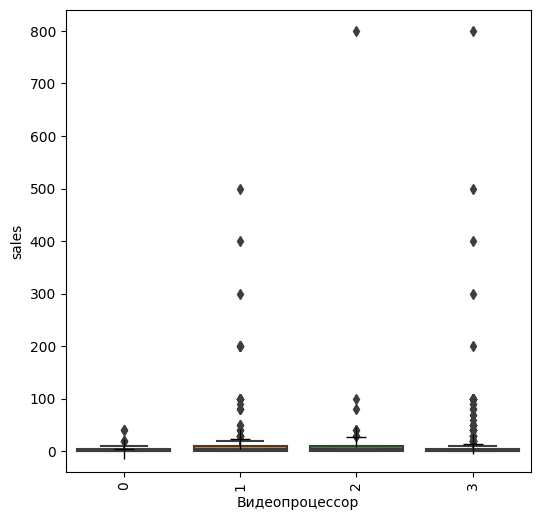

In [1544]:
# Почистим боксплоты от выбросов
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Видеопроцессор', y='sales', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1545]:
for processor in clean_data_with_encoding['Видеопроцессор'].unique():
  Q1 = clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==processor]['sales'].quantile(0.10)
  Q3 = clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==processor]['sales'].quantile(0.75)
  IQR = Q3 - Q1
  upper = clean_data_with_encoding[(clean_data_with_encoding['Видеопроцессор']==processor)&(clean_data_with_encoding['sales']>=(Q3+1.5*IQR))]
  lower = clean_data_with_encoding[(clean_data_with_encoding['Видеопроцессор']==processor)&(clean_data_with_encoding['sales']<=(Q1-1.5*IQR))]
  clean_data_with_encoding.drop(upper.index, inplace = True)
  clean_data_with_encoding.drop(lower.index, inplace = True)

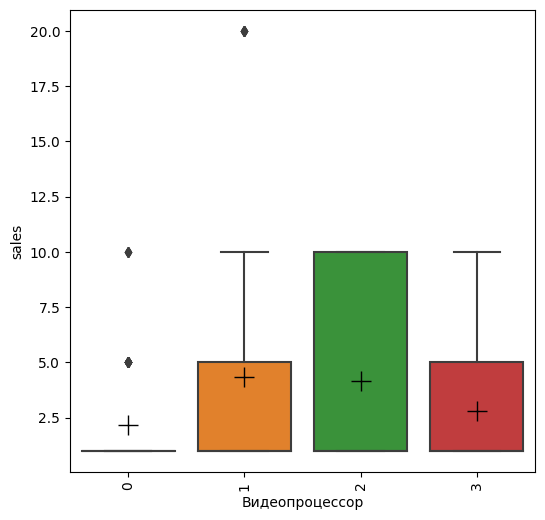

In [1546]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Видеопроцессор', y='sales', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1547]:
# Видим, что все значения p-value < 0.05, значит выборки не соответствуют нормальной генеральной совокупности
# Стоит применить непараметрический критерий
for i in clean_data_with_encoding['Видеопроцессор'].unique():
  print(i,stats.shapiro(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==i]['sales'].dropna())[1])

2 1.0322943921892147e-07
3 1.8623553580348778e-28
1 6.844495470067526e-15
0 3.034782169487882e-14


In [1548]:
# Критерии независимы, не соответствуют норм.ген.совокупности, их больше 2
# Применяем kruskalwallis()
pr_0 = np.array(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==0]['sales'])
pr_1 = np.array(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==1]['sales'])
pr_2 = np.array(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==2]['sales'])
pr_3 = np.array(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==3]['sales'])


In [1549]:
# Гипотеза Н0 о равенстве средних показателей отклоняем
# В группах есть статистически значимые отличия, видеопроцессоры оказывают влияние на продажи
stats.mstats.kruskalwallis(pr_0,pr_1,pr_2,pr_3)


KruskalResult(statistic=19.961159438681428, pvalue=0.00017291768589601102)

In [1550]:
# Гипотеза Н0: статистически значимые отличия в группах (Операционная система) отсутствует
clean_data_with_encoding.groupby('Операционная система')[['sales']].mean()

,sales
Операционная система,
0,2.243243
1,4.951807
2,2.995327
3,3.454545


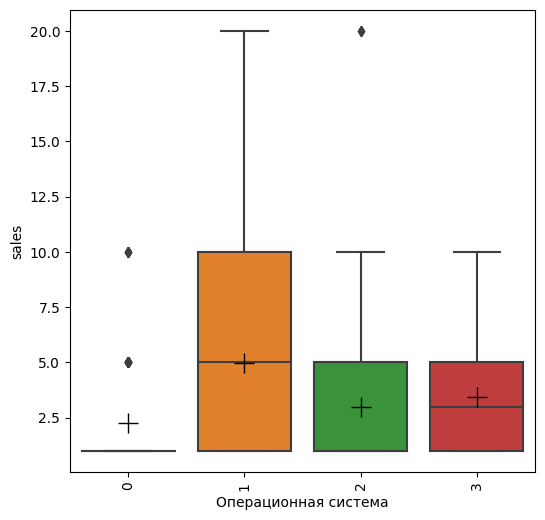

In [1551]:
# Почистим боксплоты от выбросов
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Операционная система', y='sales', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1554]:
for op in clean_data_with_encoding['Операционная система'].unique():
  Q1 = clean_data_with_encoding[clean_data_with_encoding['Операционная система']==op]['sales'].quantile(0.20)
  Q3 = clean_data_with_encoding[clean_data_with_encoding['Операционная система']==op]['sales'].quantile(0.75)
  IQR = Q3 - Q1
  upper = clean_data_with_encoding[(clean_data_with_encoding['Операционная система']==op)&(clean_data_with_encoding['sales']>=(Q3+1.5*IQR))]
  lower = clean_data_with_encoding[(clean_data_with_encoding['Операционная система']==op)&(clean_data_with_encoding['sales']<=(Q1-1.5*IQR))]
  clean_data_with_encoding.drop(upper.index, inplace = True)
  clean_data_with_encoding.drop(lower.index, inplace = True)

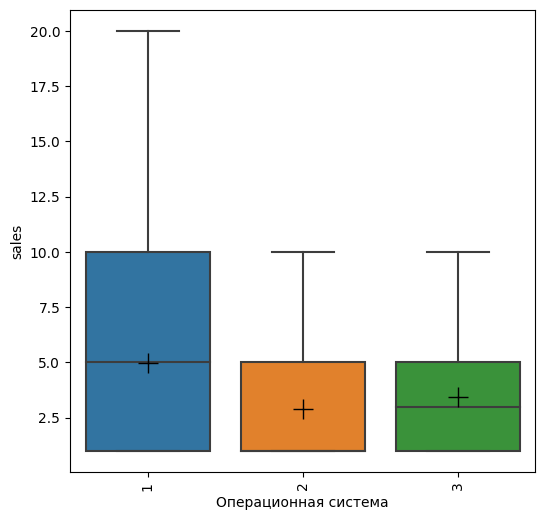

In [1555]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Операционная система', y='sales', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1556]:
# Видим, что все значения p-value < 0.05, значит выборки не соответствуют нормальной генеральной совокупности
# Стоит применить непараметрический критерий
for i in clean_data_with_encoding['Операционная система'].unique():
  print(i,stats.shapiro(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==i]['sales'].dropna())[1])

1 5.504809386103204e-10
2 1.821397839706465e-29
3 8.58334096847102e-05


In [1557]:
# Критерии независимы, не соответствуют норм.ген.совокупности, их больше 2
# Применяем kruskalwallis()
op_0 = np.array(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==0]['sales'])
op_1 = np.array(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==1]['sales'])
op_2 = np.array(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==2]['sales'])
op_3 = np.array(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==3]['sales'])

In [1558]:
# Гипотеза Н0 о равенстве средних показателей отклоняем
# В группах есть статистически значимые отличия, операционная система оказывает влияние на продажи
stats.mstats.kruskalwallis(op_0,op_1,op_2,op_3)


KruskalResult(statistic=22.062748579211, pvalue=6.329915916677888e-05)

In [1559]:
# Гипотеза Н0: статистически значимые отличия в группах (Процессор_тип) отсутствует
clean_data_with_encoding.groupby('Процессор_тип')[['sales']].mean()

,sales
Процессор_тип,
0,5.500000
1,2.898592
2,3.875000
3,2.333333


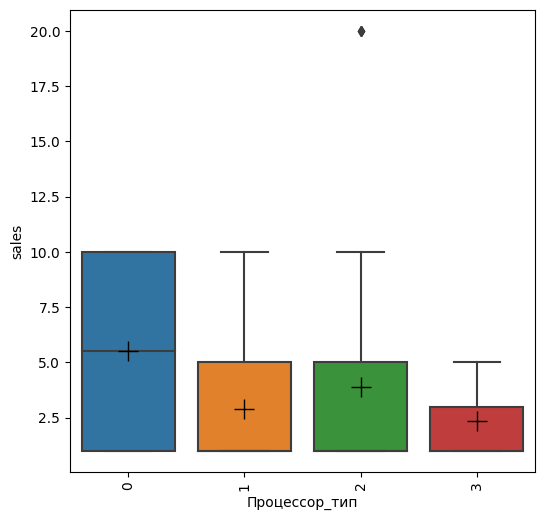

In [1560]:
# Почистим боксплоты от выбросов
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Процессор_тип', y='sales', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1561]:
for type_pr in clean_data_with_encoding['Процессор_тип'].unique():
  Q1 = clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==type_pr]['sales'].quantile(0.10)
  Q3 = clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==type_pr]['sales'].quantile(0.75)
  IQR = Q3 - Q1
  upper = clean_data_with_encoding[(clean_data_with_encoding['Процессор_тип']==type_pr)&(clean_data_with_encoding['sales']>=(Q3+1.5*IQR))]
  lower = clean_data_with_encoding[(clean_data_with_encoding['Процессор_тип']==type_pr)&(clean_data_with_encoding['sales']<=(Q1-1.5*IQR))]
  clean_data_with_encoding.drop(upper.index, inplace = True)
  clean_data_with_encoding.drop(lower.index, inplace = True)

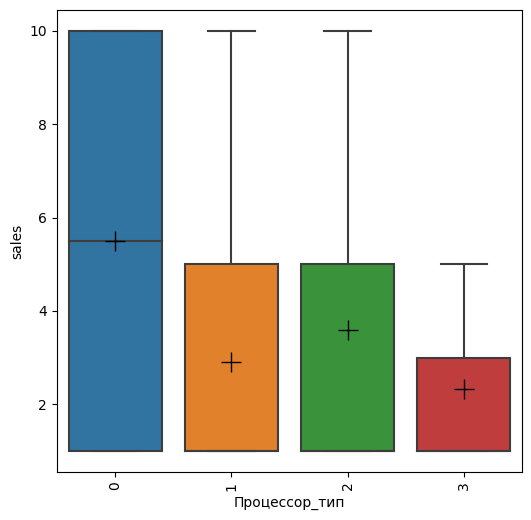

In [1562]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Процессор_тип', y='sales', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1563]:
# Видим, что все значения, кроме одного, p-value < 0.05, значит выборки не соответствуют нормальной генеральной совокупности
# Стоит применить непараметрический критерий
for i in clean_data_with_encoding['Процессор_тип'].unique():
  print(i,stats.shapiro(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==i]['sales'].dropna())[1])

1 8.395586998910725e-27
2 6.603435769570023e-17
3 -9.106917104872991e-07
0 0.02385682798922062


In [1564]:
# Критерии независимы, не соответствуют норм.ген.совокупности, их больше 2
# Применяем kruskalwallis()
tp_0 = np.array(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==0]['sales'])
tp_1 = np.array(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==1]['sales'])
tp_2 = np.array(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==2]['sales'])
tp_3 = np.array(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==3]['sales'])

In [1565]:
# Гипотеза Н0 о равенстве средних показателей принимается
# В группах нет статистически значимых отличий, тип процессора не оказывает влияние на продажи
stats.mstats.kruskalwallis(tp_0,tp_1,tp_2,tp_3)


KruskalResult(statistic=5.911932485227231, pvalue=0.1159744045341599)

In [1566]:
# Гипотеза Н0: статистически значимые отличия в группах (Тип оперативной памяти) отсутствует
clean_data_with_encoding.groupby('Тип оперативной памяти')[['sales']].mean()

,sales
Тип оперативной памяти,
0,4.142857
1,4.000000
2,3.087302


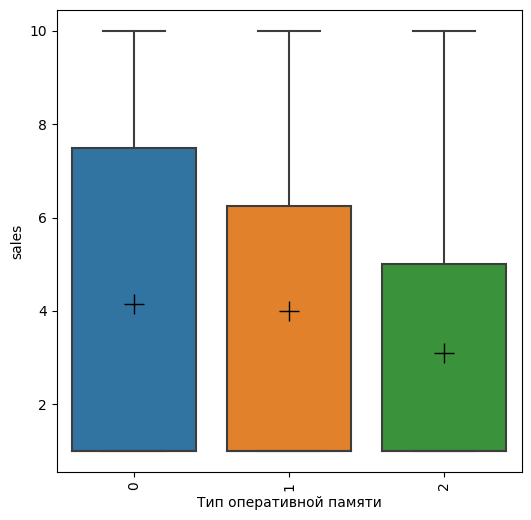

In [1567]:
# Построим боксплоты
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Тип оперативной памяти', y='sales', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1568]:
# Видим, что все значения p-value < 0.05, значит выборки не соответствуют нормальной генеральной совокупности
# Стоит применить непараметрический критерий
for i in clean_data_with_encoding['Тип оперативной памяти'].unique():
  print(i,stats.shapiro(clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==i]['sales'].dropna())[1])

2 1.3832542316521567e-30
0 0.007359541952610016
1 0.00023073729244060814


In [1569]:
# Критерии независимы, не соответствуют норм.ген.совокупности, их больше 2
# Применяем kruskalwallis()
t_op_0 = np.array(clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==0]['sales'])
t_op_1 = np.array(clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==1]['sales'])
t_op_2 = np.array(clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==2]['sales'])


In [1570]:
# Гипотеза Н0 о равенстве средних показателей принимается
# В группах нет статистически значимых отличий, тип оперативной памяти не оказывает влияние на продажи
stats.mstats.kruskalwallis(t_op_0,t_op_1,t_op_2)


KruskalResult(statistic=1.2104024802394726, pvalue=0.5459645456133139)

In [1571]:
# Гипотеза Н0: статистически значимые отличия в группах (Видеопроцессоры) отсутствует
clean_data_with_encoding.groupby('Видеопроцессор')[['price']].mean()

,price
Видеопроцессор,
0,39354.777778
1,37493.766667
2,35135.758621
3,74816.769648


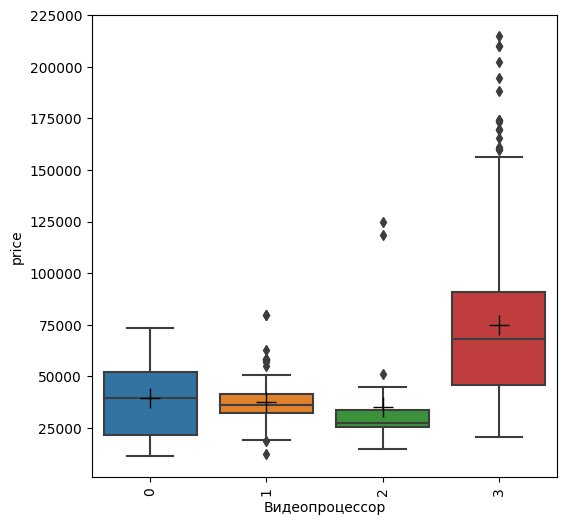

In [1572]:
# Почистим боксплоты от выбросов
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Видеопроцессор', y='price', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1573]:
for processor in clean_data_with_encoding['Видеопроцессор'].unique():
  Q1 = clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==processor]['price'].quantile(0.10)
  Q3 = clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==processor]['price'].quantile(0.75)
  IQR = Q3 - Q1
  upper = clean_data_with_encoding[(clean_data_with_encoding['Видеопроцессор']==processor)&(clean_data_with_encoding['price']>=(Q3+1.5*IQR))]
  lower = clean_data_with_encoding[(clean_data_with_encoding['Видеопроцессор']==processor)&(clean_data_with_encoding['price']<=(Q1-1.5*IQR))]
  clean_data_with_encoding.drop(upper.index, inplace = True)
  clean_data_with_encoding.drop(lower.index, inplace = True)

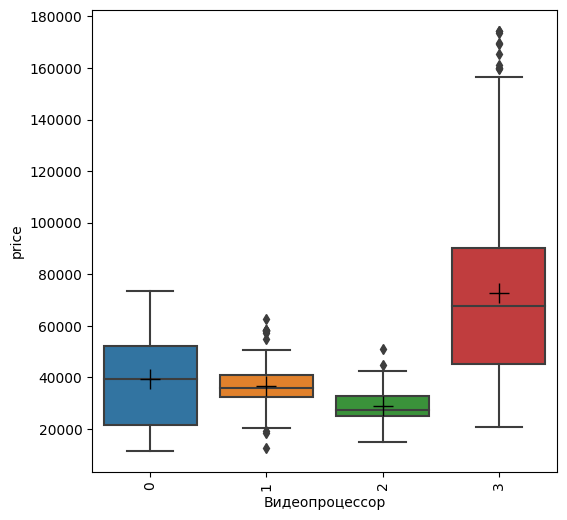

In [1574]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Видеопроцессор', y='price', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1575]:
# Видим, что есть значение p-value > 0.05, но т.к. оставшиеся 3 выборки < 0.05 значит выборки не соответствуют нормальной генеральной совокупности
# Стоит применить непараметрический критерий
for i in clean_data_with_encoding['Видеопроцессор'].unique():
  print(i,stats.shapiro(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==i]['price'].dropna())[1])

2 0.26873669028282166
3 5.034461888174524e-13
1 0.0040335822850465775
0 0.8819316625595093


In [1576]:
# Критерии независимы, не соответствуют норм.ген.совокупности, их больше 2
# Применяем kruskalwallis()
pr_0 = np.array(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==0]['price'])
pr_1 = np.array(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==1]['price'])
pr_2 = np.array(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==2]['price'])
pr_3 = np.array(clean_data_with_encoding[clean_data_with_encoding['Видеопроцессор']==3]['price'])


In [1577]:
# Гипотеза Н0 о равенстве средних показателей отклоняем
# Но добавляю, что видеопроцессоры оказывают влияние на ценообразование
stats.mstats.kruskalwallis(pr_0,pr_1,pr_2,pr_3)


KruskalResult(statistic=194.14685971790857, pvalue=7.758365328381724e-42)

In [1578]:
# Гипотеза Н0: статистически значимые отличия в группах (Операционная система) отсутствует
clean_data_with_encoding.groupby('Операционная система')[['price']].mean()

,price
Операционная система,
1,51924.950000
2,63876.370192
3,53883.619048


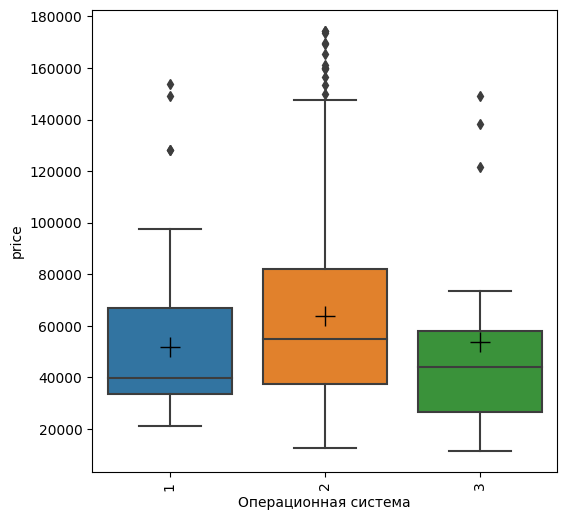

In [1579]:
# Почистим боксплоты от выбросов
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Операционная система', y='price', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1580]:
for type_op in clean_data_with_encoding['Операционная система'].unique():
  Q1 = clean_data_with_encoding[clean_data_with_encoding['Операционная система']==type_op]['price'].quantile(0.10)
  Q3 = clean_data_with_encoding[clean_data_with_encoding['Операционная система']==type_op]['price'].quantile(0.75)
  IQR = Q3 - Q1
  upper = clean_data_with_encoding[(clean_data_with_encoding['Операционная система']==type_op)&(clean_data_with_encoding['price']>=(Q3+1.5*IQR))]
  lower = clean_data_with_encoding[(clean_data_with_encoding['Операционная система']==type_op)&(clean_data_with_encoding['price']<=(Q1-1.5*IQR))]
  clean_data_with_encoding.drop(upper.index, inplace = True)
  clean_data_with_encoding.drop(lower.index, inplace = True)

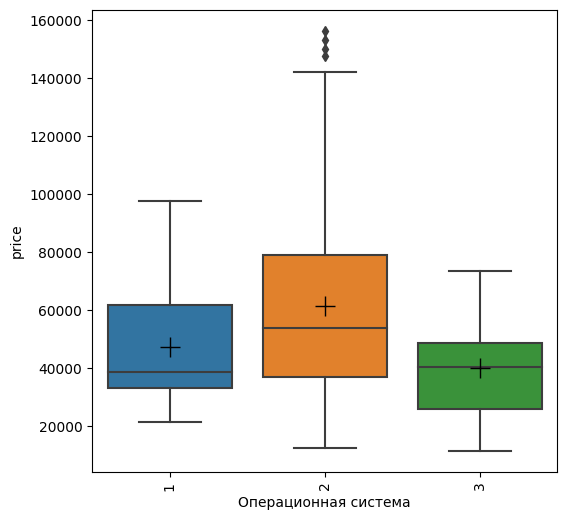

In [1581]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Операционная система', y='price', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1582]:
# Видим, что все значения p-value < 0.05, значит выборки не соответствуют нормальной генеральной совокупности
# Стоит применить непараметрический критерий
for i in clean_data_with_encoding['Операционная система'].unique():
  print(i,stats.shapiro(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==i]['price'].dropna())[1])

1 7.790848144395568e-07
2 6.417157387070271e-13
3 0.6018953919410706


In [1583]:
# Критерии независимы, не соответствуют норм.ген.совокупности, их больше 2
# Применяем kruskalwallis()
op_0 = np.array(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==0]['price'])
op_1 = np.array(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==1]['price'])
op_2 = np.array(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==2]['price'])
op_3 = np.array(clean_data_with_encoding[clean_data_with_encoding['Операционная система']==3]['price'])

In [1584]:
# Гипотеза Н0 о равенстве средних показателей отклоняем
# В группах есть статистически значимые отличия, операционная система оказывает влияние на цену компьютера
stats.mstats.kruskalwallis(op_0,op_1,op_2,op_3)


KruskalResult(statistic=24.51646097174782, pvalue=1.9486164773853903e-05)

In [1585]:
# Гипотеза Н0: статистически значимые отличия в группах (Процессор_тип) отсутствует
clean_data_with_encoding.groupby('Процессор_тип')[['price']].mean()

,price
Процессор_тип,
0,46760.000000
1,65839.865854
2,44698.769697
3,21406.666667


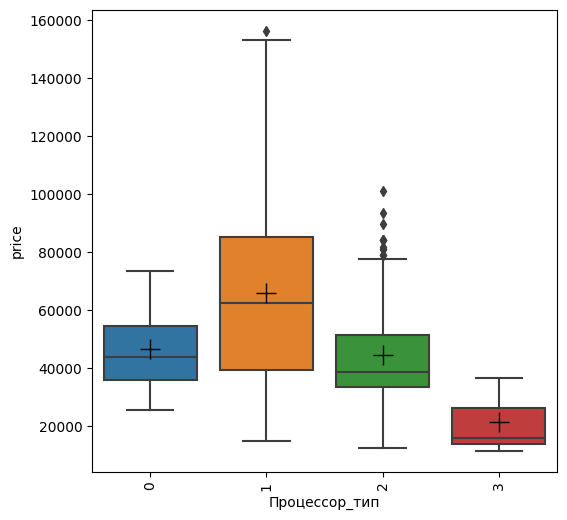

In [1586]:
# Почистим боксплоты от выбросов
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Процессор_тип', y='price', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1587]:
for type_pr in clean_data_with_encoding['Процессор_тип'].unique():
  Q1 = clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==type_pr]['price'].quantile(0.05)
  Q3 = clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==type_pr]['price'].quantile(0.75)
  IQR = Q3 - Q1
  upper = clean_data_with_encoding[(clean_data_with_encoding['Процессор_тип']==type_pr)&(clean_data_with_encoding['price']>=(Q3+1.5*IQR))]
  lower = clean_data_with_encoding[(clean_data_with_encoding['Процессор_тип']==type_pr)&(clean_data_with_encoding['price']<=(Q1-1.5*IQR))]
  clean_data_with_encoding.drop(upper.index, inplace = True)
  clean_data_with_encoding.drop(lower.index, inplace = True)

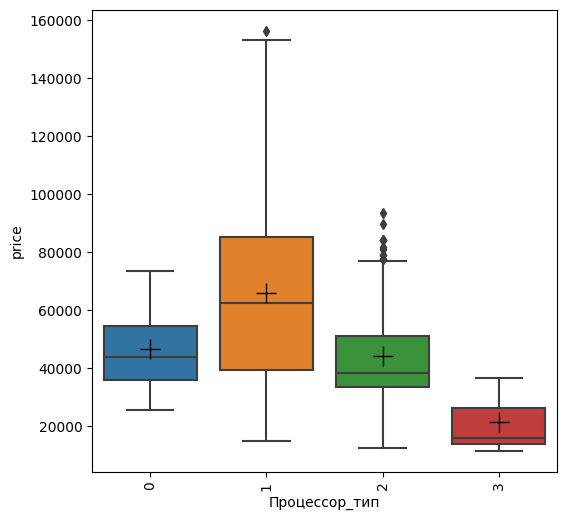

In [1588]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Процессор_тип', y='price', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1589]:
# Видим, что 2 из 4 выборок с p-value < 0.05, значит выборки не соответствуют нормальной генеральной совокупности
# Стоит применить непараметрический критерий
for i in clean_data_with_encoding['Процессор_тип'].unique():
  print(i,stats.shapiro(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==i]['price'].dropna())[1])

1 1.8080392738539786e-09
2 6.845062472393693e-08
3 0.31944218277931213
0 0.8472120761871338


In [1590]:
# Критерии независимы, не соответствуют норм.ген.совокупности, их больше 2
# Применяем kruskalwallis()
tp_0 = np.array(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==0]['price'])
tp_1 = np.array(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==1]['price'])
tp_2 = np.array(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==2]['price'])
tp_3 = np.array(clean_data_with_encoding[clean_data_with_encoding['Процессор_тип']==3]['price'])

In [1591]:
# Гипотеза Н0 о равенстве средних показателей отклоняется
# В группах есть статистически значимые отличия, тип процессора оказывает влияние на формирование цены
stats.mstats.kruskalwallis(tp_0,tp_1,tp_2,tp_3)


KruskalResult(statistic=66.17406791309841, pvalue=2.8131179370584943e-14)

In [1592]:
# Гипотеза Н0: статистически значимые отличия в группах (Тип оперативной памяти) отсутствует
clean_data_with_encoding.groupby('Тип оперативной памяти')[['price']].mean()

,price
Тип оперативной памяти,
0,38711.428571
1,32840.266667
2,59449.410901


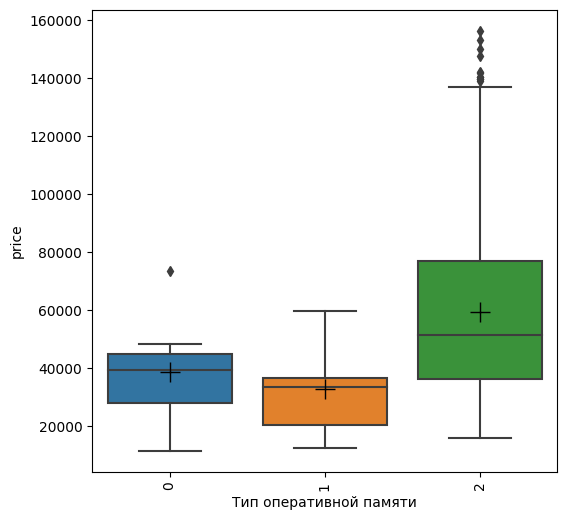

In [1593]:
# Построим боксплоты и очистим от выбросов
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Тип оперативной памяти', y='price', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1594]:
for type_op in clean_data_with_encoding['Тип оперативной памяти'].unique():
  Q1 = clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==type_op]['price'].quantile(0.10)
  Q3 = clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==type_op]['price'].quantile(0.75)
  IQR = Q3 - Q1
  upper = clean_data_with_encoding[(clean_data_with_encoding['Тип оперативной памяти']==type_op)&(clean_data_with_encoding['price']>=(Q3+1.5*IQR))]
  lower = clean_data_with_encoding[(clean_data_with_encoding['Тип оперативной памяти']==type_op)&(clean_data_with_encoding['price']<=(Q1-1.5*IQR))]
  clean_data_with_encoding.drop(upper.index, inplace = True)
  clean_data_with_encoding.drop(lower.index, inplace = True)

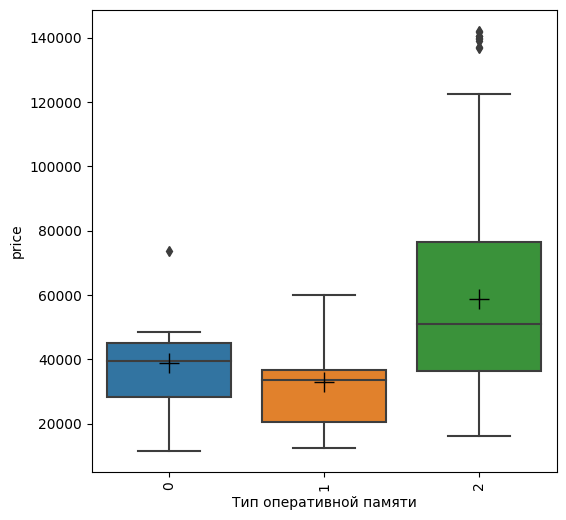

In [1595]:
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x='Тип оперативной памяти', y='price', data=clean_data_with_encoding,
                  showmeans=True,
                  meanprops={"marker": "+",
                       "markeredgecolor": "black",
                       "markersize": "15"})
plt.xticks(fontsize = 10, rotation = 90) # поворот подписи на 90 градусов
plt.show()

In [1596]:
# Видим, что одно из трех значений, где p-value < 0.05, значит выборки не соответствуют нормальной генеральной совокупности
# Стоит применить непараметрический критерий
for i in clean_data_with_encoding['Тип оперативной памяти'].unique():
  print(i,stats.shapiro(clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==i]['price'].dropna())[1])

2 1.0697525527349986e-14
0 0.8814311623573303
1 0.3559723198413849


In [1597]:
# Критерии независимы, не соответствуют норм.ген.совокупности, их больше 2
# Применяем kruskalwallis()
t_op_0 = np.array(clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==0]['price'])
t_op_1 = np.array(clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==1]['price'])
t_op_2 = np.array(clean_data_with_encoding[clean_data_with_encoding['Тип оперативной памяти']==2]['price'])


In [1598]:
# Гипотеза Н0 о равенстве средних показателей отклоняется
# В группах есть статистически значимые отличия, тип оперативной памяти оказывает влияние на цену
stats.mstats.kruskalwallis(t_op_0,t_op_1,t_op_2)


KruskalResult(statistic=18.982222367261187, pvalue=7.552013990066043e-05)

Анализ таблиц сопряженности

In [1599]:
# Видим распределение по признакам попарно
connection = pd.crosstab(clean_data_with_encoding['Видеопроцессор'], clean_data_with_encoding['Операционная система'])
connection

Операционная система,1,2,3
Видеопроцессор,,,
0,0,1,8
1,29,89,0
2,6,18,3
3,41,293,7


<Axes: xlabel='Видеопроцессор', ylabel='count'>

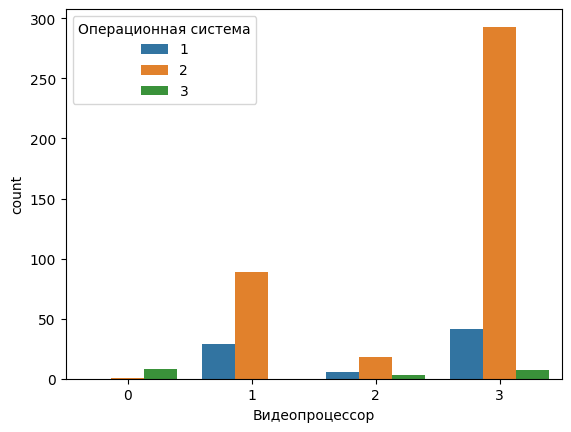

In [1600]:
sns.countplot(x=clean_data_with_encoding['Видеопроцессор'], hue=clean_data_with_encoding['Операционная система'])

In [1601]:
# Хи-квадрат критерий для таблицы сопряженности видеопроцессора и опер.системы показывает, что частоты не равны совсем и связи между показателями нет
chi2, prob, f, expected = scipy.stats.chi2_contingency(connection)
output = 'test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n'

print(output.format( chi2, f, prob))

test Statistics: 209.47011816357227
degrees of freedom: 6
p-value: 1.826369526257064e-42



In [1602]:
connection = pd.crosstab(clean_data_with_encoding['Количество ядер процессора'], clean_data_with_encoding['Тип оперативной памяти'])
connection

Тип оперативной памяти,0,1,2
Количество ядер процессора,,,
2.0,1,2,49
4.0,3,9,117
6.0,0,1,236
8.0,2,2,16
10.0,0,0,20
12.0,1,1,24
16.0,0,0,11


<Axes: xlabel='Количество ядер процессора', ylabel='count'>

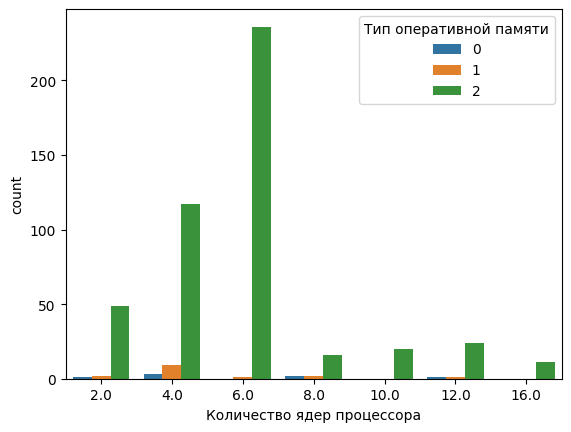

In [1603]:
# Визуально распределение сильно отличается
sns.countplot(x=clean_data_with_encoding['Количество ядер процессора'], hue=clean_data_with_encoding['Тип оперативной памяти'])

In [1604]:
# Хи-квадрат критерий для таблицы сопряженности количества ядер процессора и тип оперативной памяти показывает, что частоты не равны и связи между показателями нет
# Так как p-value значительно меньше 0,05
chi2, prob, f, expected = scipy.stats.chi2_contingency(connection)
output = 'test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n'

print(output.format( chi2, f, prob))

test Statistics: 33.75264231356406
degrees of freedom: 12
p-value: 0.0007378450397341464



Выводы по разделу:


> По результатам статистического анализа взаимосвязи продаж установлено следущее: видеопроцессоры и  операционная система оказывают влияние на продажи,
 тип процессора и тип оперативной памяти такого влиния на продажи не имеют

>Из комплектующих, оказывающих влияние на цену товара : видеопроцессоры, операционная система, тип процессора, тип оперативной памяти. Т.е. цены напрямую зависит от составляющих компьютер компонентов.






Топовые позиции по продажам.

*   Более 800 продаж: Intel HD Graphics 610, NVIDIA GeForce GT 730.
*   Более 500 продаж: AMD Radeon Vega 7, NVIDIA GeForce GT 1030.
*   Более 300 продаж: AMD Radeon R5.
*   Более 200 продаж: NVIDIA GeForce GTX 1660
*   Более 100 продаж: Intel HD Graphics 2000, NVIDIA GeForce GTX 1630	, NVIDIA GeForce GTX 1650, NVIDIA GeForce RTX 3050, NVIDIA GeForce RTX 3060

Топовые операционные системы

*   Более 800 продаж: Windows и незаполненные значения попали
*   Более 500 продаж: Windows 10 Pro, Windows пробная
*   Более 200 продаж: Windows 10 Home пробная

Видим, что самое популярное ПО - Windows

Топовые типы процессоров

*   Более 800 продаж: Intel Core i7, Intel Pentium
*   Более 500 продаж: AMD Ryzen 5, Intel Core i3
*   Более 400 продаж: Intel Core i5
*   Более 300 продаж: AMD A6, AMD Athlon
*   Более 200 продаж: AMD RYZEN 4600g Vega7 арт. 100343717

Видим, что покупатели выбирают в основном вариации из Intel Core и AMD

Топовое количество ядер процессора

*   Более 800 продаж: 2 ядра, 4 ядра.
*   Более 500 продаж: 6 ядер.
*   Более 100 продаж: 12 ядер.
Видим, что в зависимости от цели приобретение компьютера пользователи в основном выбирают 2,4 ядра, но есть и позиции в топе продаж с 12 ядрами.

Топы среди типов оперативной памяти

*   Более 800 продаж: DDR 3, DDR 4
Видим, что оба типа DDR 3 и DDR 4 привлекают покупателей в большей мере, чем версия DDR 5

Продажи и объемом оперативной памяти (Гб)

*   Более 800 продаж: 4Гб, 16 Гб
*   Более 500 продаж: 6 Гб
*   Более 200 продаж: 32 Гб

Можно сказать, что наибольший объем оперативной памяти не является главным важным параметром при выборе компьютера
Возможно покупатели отдают предпочтение потратить меньше на оперативке, и больше денег вложить в другую мощную характеристику компьютера

 Как видно из корреляционного анализы выше, признаки HDD и SSD не имеют особой связи
Но я все же считаю, что если не выбирают один диск - выбирают второй, или комбинацию из двух. все таки надо рассматривать эти признаки вместе
SSD	:

*   Более 800 продаж: 120 Гб, 512 Гб
*   Более 500 продаж: 480 Гб
*   Более 400 продаж: 240 Гб
Конечно много пустых значений по признаку HDD, и явно больше интереса по SSD. Можно интерпретировать, что это влиние пустот
Или все же большие интерес вызывают SSD накопители. Я склоняюсь к первому варианту, но из-за невозможности эти пропуски восстановить через заказчика, точно не узнать нам

Я не думаю, что есть смысл проверять взаимосвязь остальных категориальных признаков. Скорее всего ее не будет.
Комплектующие для компьютера врятли имеют между собой связь, что показывают два эксперимента выше. Поэтому перейду к дальнейшему анализу

In [1605]:
# Сохраню Series ['price'] в переменную price
price = clean_data['price']

In [1606]:
# Рассчитаю максимальное и минимальное значения цен с помощью методов max() и min() соответственно
# Минимальное значение - явно выброс из общего числа данных
max_value = price .max()
min_value = price .min()
print('Наибольшая цена: ', max_value, 'Наименьшая цена: ', min_value)

Наибольшая цена:  214954 Наименьшая цена:  254


In [1607]:
# Рассчитаю среднее значение признака с помощью метода mean()
mean_value = price.mean()
print('Средняя стоимость: ', mean_value)

Средняя стоимость:  59445.632978723406


In [1608]:
# Рассчитаю медианное значение признака с помощью метода median()
median_value = price.median()
print('Медиана цен ', median_value)

Медиана цен  47869.5


In [1609]:
# Рассчитаю процентили (10, 25, 50, 75, 90) с помощью метода quantile()
percentile_10_value = price.quantile(0.10)
percentile_25_value = price.quantile(0.25)
percentile_50_value = price.quantile(0.50)
percentile_75_value = price.quantile(0.75)
percentile_90_value = price.quantile(0.90)
print('10-й процентиль цен: ', percentile_10_value)
print('25-й процентиль цен: ', percentile_25_value)
print('50-й процентиль цен: ', percentile_50_value)
print('75-й процентиль цен: ', percentile_75_value)
print('90-й процентиль цен: ', percentile_90_value)

10-й процентиль цен:  27475.1
25-й процентиль цен:  34987.0
50-й процентиль цен:  47869.5
75-й процентиль цен:  76072.5
90-й процентиль цен:  109605.49999999999


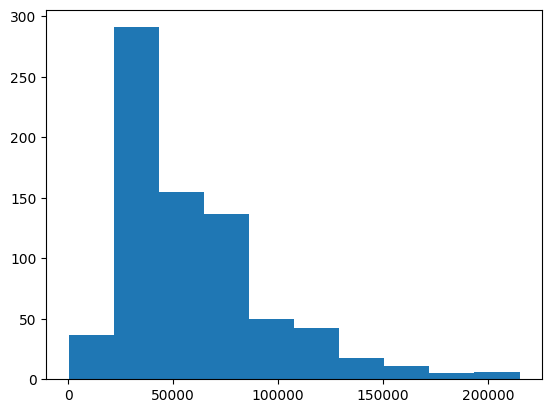

In [1610]:
# Гистограмма показывает, что больше всего покупают компьютеры в примерно от 20 000 руб. до 65 000 руб.
plt.hist(price)
plt.show()

In [1611]:
price_2 = clean_data[
    (clean_data['price']>=percentile_10_value)&
    (clean_data['price']<=percentile_90_value)]['price']

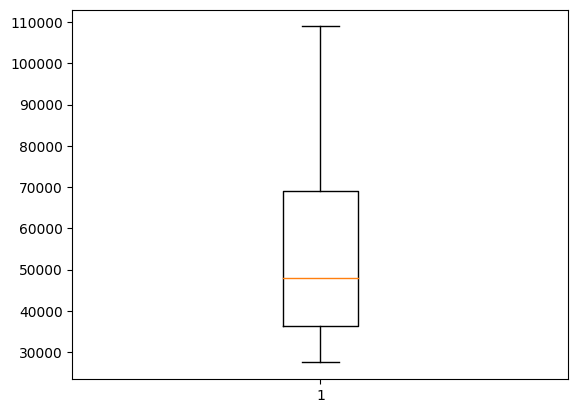

In [1612]:
# Обрезала выбросы для визуального предсталвения даннных по ценам на боксплоте
plt.boxplot(price_2)
plt.show()

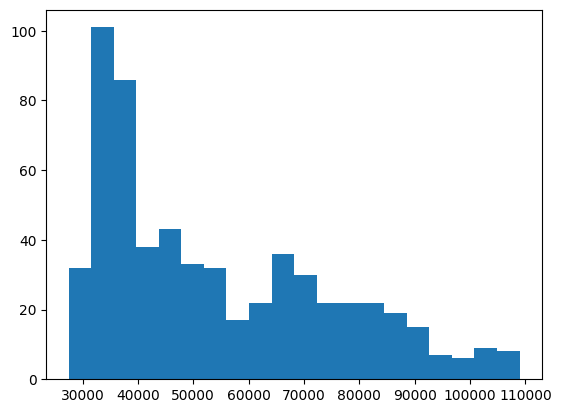

In [1613]:
# Здесь наглядно видно, что все таки типичные цены начинаются с уровня примерно 10-го процентиля 27 000 руб. и основные значения заканчиваются примерно на 40 000 руб.
# Это самые распространненые цены на компьютеры в наших данных
plt.hist(price_2, bins=20)
plt.show()

In [1614]:
top_20_sales = clean_data.sort_values('sales', ascending=False)[:20]

In [1615]:
# Проанализируем комплектующие в самых часто покупаемых компьютерах
# Вижу, что в основном компьютеры состоят из разных вариаций топовых комплектующих видеопроцессора, ПО, типа процессора и ОП, количества ядер, объема ОП и дисков HDD, SSD
# Ценовой вилкой я укажу разброс цен в диапазоне 25-го и 75-го процентиля
#
top_20_sales

,title,sales,Видеопроцессор,Операционная система,price,feedbacks,Процессор_тип,Количество ядер процессора,Тип оперативной памяти,Объем оперативной памяти (Гб),HDD,SSD
80,компьютер raskat (intel pentium g6400/4gb/120g...,800,Intel HD Graphics 610,отсутствует,36990,3,Intel Pentium,2.0,DDR 4,4.0,0.0,120.0
613,игровой компьютер i7-2600 16gb ssd 512gb gt 73...,800,NVIDIA GeForce GT 730,Windows,32900,80,Intel Core i7,4.0,DDR 3,16.0,0.0,512.0
20,игровой компьютер robotcomp аллигатор v3,500,AMD Radeon Vega 7,Windows 10 Pro,34017,128,AMD Ryzen 5,6.0,DDR 4,16.0,0.0,480.0
61,игровой компьютер robotcomp старт v1,500,NVIDIA GeForce GT 1030,windows пробная,30760,148,Intel Core i3,4.0,DDR 4,8.0,0.0,480.0
19,игровой компьютер robotcomp аллигатор v2,400,AMD Radeon Vega 7,Windows 10 Pro,32617,101,AMD Ryzen 5,6.0,DDR 4,16.0,0.0,480.0
332,игровой компьютер life tech bastion,400,NVIDIA GeForce GT 1030,Windows 10 Pro,25989,189,Intel Core i5,2.0,DDR 3,8.0,0.0,240.0
181,игровой компьютер roo24 x4 950 gt1030v1,300,NVIDIA GeForce GT 1030,Windows 10 Pro,29992,89,AMD Athlon,4.0,DDR 4,8.0,0.0,480.0
195,настольный компьютер robotcomp orion v1,300,AMD Radeon R5,windows пробная,18957,66,AMD A6,2.0,DDR 4,8.0,0.0,240.0
21,игровой компьютер robotcomp аллигатор 3.0 v1,200,AMD Radeon Vega 7,windows пробная,40694,54,AMD Ryzen 5,6.0,DDR 4,32.0,1000.0,512.0
23,игровой компьютер robotcomp аллигатор 3.0 v3,200,AMD Radeon Vega 7,Windows 10 Pro,47827,84,AMD Ryzen 5,6.0,DDR 4,32.0,1000.0,512.0


Выводы по разделу:

> Анализ цен показывает, что покупатели готовы заплатить за товар (компьютер) от 27 000 рублей до максимальных сумм - 214 000 руб.


> В топ-20 продаж на платформе представлены компьютеры с популярными по результатам аналитики комплектующими (см.ниже перечень популярных комплектующих), в той или иной конфигурации, что дает возможность покупателю подобрать нужные именно ему характеристики для будущей покупки.

> Это говорит о важности наличия позиций в разных похожих и не похожих комплектациях.

> Ценовой вилкой считаю 25-ый и 75-ый процентили с диапозоном цен от 34 987 руб. до 76 072 руб.

> Анализ показывает именно компьютеры по этим ценам как самые покупаемые по данным продаж онлайн-магазина


Общие выводы:

Проанализировав количественные показатели могу сказать следущее: сильной корреляции у целевого показателя продаж не выявлено ни с одним из числовых признаков.Думаю, это потому, что продажи компьютера вцелом не могут зависеть от одной единицы какого-либо вида комплектующих, на продажи влияет именно сочетание всех критериев комплектующих.
> Прямой взаимосвязи у цены и продаж так же не было выявлено, поскольку, как указала выше, покупатели отдают больше внимания выбору характеристик комплектующих при выборе компьютера, и уже вторично - цене на него.
>  Из статистического анализы цены с такими комплектующими как: количество ядер процессора, объем оперативной памяти и диски HDD, SSD, выявлена сильная корреляционная связь,т.е. с ростом показателей этих комплектующих - растет и цена на товар.




> По результатам статистического анализа взаимосвязи продаж установлено следущее: видеопроцессоры и  операционная система оказывают влияние на продажи,
 тип процессора и тип оперативной памяти такого влиния на продажи не имеют.

>Из комплектующих, оказывающих влияние на цену товара : видеопроцессоры, операционная система, тип процессора, тип оперативной памяти. Т.е. получается, на цену прямопропорционально влияют характеристики всех комплектующих компьютера.






Топовые позиции по продажам.

*   Более 800 продаж: Intel HD Graphics 610, NVIDIA GeForce GT 730.
*   Более 500 продаж: AMD Radeon Vega 7, NVIDIA GeForce GT 1030.
*   Более 300 продаж: AMD Radeon R5.
*   Более 200 продаж: NVIDIA GeForce GTX 1660
*   Более 100 продаж: Intel HD Graphics 2000, NVIDIA GeForce GTX 1630	, NVIDIA GeForce GTX 1650, NVIDIA GeForce RTX 3050, NVIDIA GeForce RTX 3060

Топовые операционные системы

*   Более 800 продаж: Windows и незаполненные значения попали
*   Более 500 продаж: Windows 10 Pro, Windows пробная
*   Более 200 продаж: Windows 10 Home пробная

Видим, что самое популярное ПО - Windows

Топовые типы процессоров

*   Более 800 продаж: Intel Core i7, Intel Pentium
*   Более 500 продаж: AMD Ryzen 5, Intel Core i3
*   Более 400 продаж: Intel Core i5
*   Более 300 продаж: AMD A6, AMD Athlon
*   Более 200 продаж: AMD RYZEN 4600g Vega7 арт. 100343717

Видим, что покупатели выбирают в основном вариации из Intel Core и AMD

Топовое количество ядер процессора

*   Более 800 продаж: 2 ядра, 4 ядра.
*   Более 500 продаж: 6 ядер.
*   Более 100 продаж: 12 ядер.
Видим, что в зависимости от цели приобретение компьютера пользователи в основном выбирают 2,4 ядра, но есть и позиции в топе продаж с 12 ядрами.

Топы среди типов оперативной памяти

*   Более 800 продаж: DDR 3, DDR 4
Видим, что оба типа DDR 3 и DDR 4 привлекают покупателей в большей мере, чем версия DDR 5

Продажи и объемом оперативной памяти (Гб)

*   Более 800 продаж: 4Гб, 16 Гб
*   Более 500 продаж: 6 Гб
*   Более 200 продаж: 32 Гб

Можно сказать, что наибольший объем оперативной памяти не является главным важным параметром при выборе компьютера
Возможно покупатели отдают предпочтение потратить меньше на опер.память, и больше денег вложить в другую мощную характеристику компьютера.

 Как видно из корреляционного анализы выше, признаки HDD и SSD не имеют особой связи
Но я все же считаю, что если не выбирают один диск - выбирают второй, или комбинацию из двух. все таки надо рассматривать эти признаки вместе
SSD	:

*   Более 800 продаж: 120 Гб, 512 Гб
*   Более 500 продаж: 480 Гб
*   Более 400 продаж: 240 Гб
Конечно много пустых значений по признаку HDD, и явно больше интереса по SSD. Можно интерпретировать, что это влиние пустот
Или все же большие интерес вызывают SSD накопители.

> Анализ цен показывает, что покупатели готовы заплатить за товар (компьютер) от 27 000 рублей до максимальных сумм - 214 000 руб.


> В топ-20 продаж на платформе представлены компьютеры с популярными по результатам аналитики комплектующими (см. перечень популярных комплектующих), в той или иной конфигурации, что дает возможность покупателю подобрать для себя нужные именно ему характеристики для будущей покупки.

> Это говорит о важности наличия позиций в разных похожих и не похожих комплектациях.

> Ценовой вилкой считаю 25-ый и 75-ый процентили с диапазоном цен от 34 987 руб. до 76 072 руб.

> Анализ показывает именно компьютеры по этим ценам как самые покупаемые по данным продаж онлайн-магазина конкурента.
